# **Esame di Probabilità e Statistica**

### *Alberto Lazzeri*

### <span style="color:green">Analisi della popolazione per fascia di reddito della Danimarca tra il 2014 e il 2023.</span>

In [1]:
#librerie
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.stats import norm, kstest
import seaborn as sns
import geopandas as gpd
from PIL import Image
from IPython.display import HTML
import os as os
import warnings
warnings.filterwarnings("ignore")

## <span style="color:red">Introduzione</span>
Innanzitutto inizio a studiare la popolazione danese. Inizio dividendo il dataset in 3 categorie:
* numero di famiglie (totali e per fascia di reddito, lo mostro come esempio)
* numero di coppie (totali e per fascia di reddito)
* numero di singles (totali e per fascia di reddito)

In seguito divido ogni nuovo dataset in popolazione totale e popolazione per fascia di reddito.

In [2]:
df = pd.read_csv("family_income_dk2014-2023.csv")
col_to_convert = df.columns[df.columns.get_loc('2014'):]
df[col_to_convert] = df[col_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0)
df_families=df[df["c3"]=="Families, total"]
df_couples= df[df["c3"]=="Couples, total"]
df_singles= df[df["c3"]=="Single people, total"]
df_families

,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Families in the group (Number),Total,"Families, total",All Denmark,2882246.0,2913147.0,2943524.0,2973031.0,2995484.0,3014327.0,3042302.0,3066273.0,3087026.0,3118634.0
1,Families in the group (Number),Total,"Families, total",Copenhagen,343970.0,349454.0,354843.0,360914.0,366895.0,371417.0,377095.0,381659.0,384503.0,388467.0
2,Families in the group (Number),Total,"Families, total",Frederiksberg,60036.0,60418.0,60653.0,60256.0,59846.0,59789.0,59842.0,60114.0,60472.0,60701.0
3,Families in the group (Number),Total,"Families, total",Dragør,6464.0,6501.0,6583.0,6628.0,6638.0,6746.0,6776.0,6791.0,6722.0,6742.0
4,Families in the group (Number),Total,"Families, total",Tårnby,20869.0,21050.0,21193.0,21261.0,21241.0,21235.0,21137.0,21191.0,21230.0,21660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,Families in the group (Number),"1 million DKK, and more","Families, total",Morsø,415.0,417.0,446.0,528.0,568.0,608.0,760.0,874.0,903.0,997.0
3065,Families in the group (Number),"1 million DKK, and more","Families, total",Rebild,1083.0,1192.0,1274.0,1457.0,1544.0,1696.0,2150.0,2421.0,2478.0,2864.0
3066,Families in the group (Number),"1 million DKK, and more","Families, total",Thisted,960.0,1032.0,1160.0,1348.0,1415.0,1600.0,1905.0,2186.0,2209.0,2495.0
3067,Families in the group (Number),"1 million DKK, and more","Families, total",Vesthimmerlands,783.0,842.0,928.0,1053.0,1127.0,1230.0,1472.0,1744.0,1814.0,2023.0


In [3]:
df_families_all_freq= df_families[df_families["c2"]=="Total"]
df_couples_all_freq= df_couples[df_couples["c2"]=="Total"]
df_singles_all_freq= df_singles[df_singles["c2"]=="Total"]
df_families_all_freq=df_families_all_freq.reset_index()
df_couples_all_freq=df_couples_all_freq.reset_index()
df_singles_all_freq=df_singles_all_freq.reset_index()
df_families_all_freq

,index,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,Families in the group (Number),Total,"Families, total",All Denmark,2882246.0,2913147.0,2943524.0,2973031.0,2995484.0,3014327.0,3042302.0,3066273.0,3087026.0,3118634.0
1,1,Families in the group (Number),Total,"Families, total",Copenhagen,343970.0,349454.0,354843.0,360914.0,366895.0,371417.0,377095.0,381659.0,384503.0,388467.0
2,2,Families in the group (Number),Total,"Families, total",Frederiksberg,60036.0,60418.0,60653.0,60256.0,59846.0,59789.0,59842.0,60114.0,60472.0,60701.0
3,3,Families in the group (Number),Total,"Families, total",Dragør,6464.0,6501.0,6583.0,6628.0,6638.0,6746.0,6776.0,6791.0,6722.0,6742.0
4,4,Families in the group (Number),Total,"Families, total",Tårnby,20869.0,21050.0,21193.0,21261.0,21241.0,21235.0,21137.0,21191.0,21230.0,21660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Families in the group (Number),Total,"Families, total",Morsø,10487.0,10357.0,10422.0,10420.0,10423.0,10384.0,10417.0,10442.0,10342.0,10327.0
95,95,Families in the group (Number),Total,"Families, total",Rebild,13049.0,13197.0,13296.0,13550.0,13593.0,13689.0,13930.0,13977.0,13989.0,14093.0
96,96,Families in the group (Number),Total,"Families, total",Thisted,21573.0,21604.0,21657.0,21731.0,21693.0,21757.0,21795.0,21790.0,21863.0,21871.0
97,97,Families in the group (Number),Total,"Families, total",Vesthimmerlands,18246.0,18312.0,18392.0,18530.0,18594.0,18560.0,18552.0,18475.0,18501.0,18567.0


In [4]:
df_fam_reddito=df_families[df_families['c2'].str.contains("DKK")]
df_coup_reddito=df_couples[df_couples['c2'].str.contains("DKK")]
df_sing_reddito=df_singles[df_singles['c2'].str.contains("DKK")]
df_fam_reddito = df_fam_reddito.reset_index()
df_coup_reddito = df_coup_reddito.reset_index()
df_sing_reddito = df_sing_reddito.reset_index()
df_fam_reddito

,index,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,297,Families in the group (Number),"Less than 200,000 DKK","Families, total",All Denmark,549844.0,539702.0,530210.0,513086.0,491578.0,464554.0,436688.0,397701.0,382463.0,348661.0
1,298,Families in the group (Number),"Less than 200,000 DKK","Families, total",Copenhagen,104664.0,103081.0,101702.0,100739.0,98543.0,94881.0,92007.0,84330.0,80731.0,74540.0
2,299,Families in the group (Number),"Less than 200,000 DKK","Families, total",Frederiksberg,14180.0,13686.0,13398.0,12814.0,11830.0,11002.0,10243.0,9461.0,9409.0,8250.0
3,300,Families in the group (Number),"Less than 200,000 DKK","Families, total",Dragør,707.0,698.0,720.0,686.0,619.0,610.0,580.0,527.0,456.0,439.0
4,301,Families in the group (Number),"Less than 200,000 DKK","Families, total",Tårnby,3221.0,3162.0,3141.0,2950.0,2774.0,2603.0,2326.0,2103.0,1917.0,1797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3064,Families in the group (Number),"1 million DKK, and more","Families, total",Morsø,415.0,417.0,446.0,528.0,568.0,608.0,760.0,874.0,903.0,997.0
986,3065,Families in the group (Number),"1 million DKK, and more","Families, total",Rebild,1083.0,1192.0,1274.0,1457.0,1544.0,1696.0,2150.0,2421.0,2478.0,2864.0
987,3066,Families in the group (Number),"1 million DKK, and more","Families, total",Thisted,960.0,1032.0,1160.0,1348.0,1415.0,1600.0,1905.0,2186.0,2209.0,2495.0
988,3067,Families in the group (Number),"1 million DKK, and more","Families, total",Vesthimmerlands,783.0,842.0,928.0,1053.0,1127.0,1230.0,1472.0,1744.0,1814.0,2023.0


## <span style="color:red">1. Studio della popolazione totale e per fascia di reddito su tutta la Danimarca</span>
Studio quindi la popolazione totale della Danimarca al variare degli anni e in seguito mostro la densità di popolazione per fascia di reddito al variare degli anni per vederne la variazione.

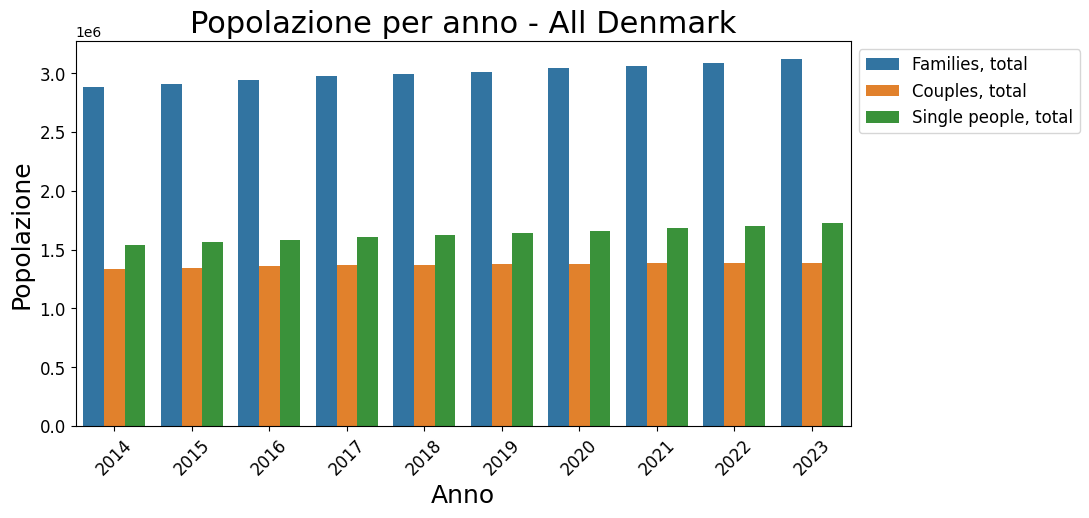

In [5]:
df_fam_all_denmark = df_families_all_freq[df_families_all_freq['place'] == 'All Denmark'].drop(columns=['index','c1','c2','c3','place'])
df_coup_all_denmark = df_couples_all_freq[df_couples_all_freq['place'] == 'All Denmark'].drop(columns=['index','c1','c2','c3','place'])
df_singles_all_denmark = df_singles_all_freq[df_singles_all_freq['place'] == 'All Denmark'].drop(columns=['index','c1','c2','c3','place'])

# Trasformiamo ciascun dataset in formato lungo
df_fam_all_long = df_fam_all_denmark.T.reset_index()
df_fam_all_long.columns = ['Anno', 'Popolazione']
df_fam_all_long['Type'] = r'Families, total'

df_coup_all_long = df_coup_all_denmark.T.reset_index()
df_coup_all_long.columns = ['Anno', 'Popolazione']
df_coup_all_long['Type'] = r'Couples, total'

df_singles_long = df_singles_all_denmark.T.reset_index()
df_singles_long.columns = ['Anno', 'Popolazione']
df_singles_long['Type'] = r'Single people, total'

df_all = pd.concat([df_fam_all_long, df_coup_all_long, df_singles_long])


plt.figure(figsize=(10,5))
sns.barplot(x='Anno', y='Popolazione', hue='Type', data=df_all, dodge=True)

plt.title(r"Popolazione per anno - All Denmark",fontsize=22)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.xlabel(r'Anno',fontsize=18)
plt.ylabel(r'Popolazione',fontsize=18)
plt.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [6]:
print("Percentuale di crescita delle famiglie: ",round((df_fam_all_denmark['2023']/df_fam_all_denmark['2014']-1)[0]*100,2), "%")
print("Percentuale di crescita delle coppie:   ",round((df_coup_all_denmark['2023']/df_coup_all_denmark['2014']-1)[0]*100,2), "%")
print("Percentuale di crescita dei singles:    ",round((df_singles_all_denmark['2023']/df_singles_all_denmark['2014']-1)[0]*100,2), "%")

Percentuale di crescita delle famiglie:  8.2 %
Percentuale di crescita delle coppie:    3.71 %
Percentuale di crescita dei singles:     12.09 %


### <span style="color:red">1. Analisi</span>
Dal grafico si nota che la **popolazione** tra il 2014 e il 2023 **non cresce significativamente**, infatti le percentuali di crescita sono:
* $8.20 \%$ per le famiglie
* $3.71 \%$ per le coppie
* $12.09 \%$ per i singles

Ho infatti ritenuto opportuno considerare la crescita come *rilevante* se la percentuale di crescita è maggiore o uguale del $25 \%$, ovvero se aumenta di un quarto o più.

Vado ora a studiare la popolazione per fascia di reddito. Per una migliore analisi, normalizzo la popolazione per fascia di reddito, dividendo ogni valore per la popolazione totale relativa ad un anno specifico.

In [7]:
df_fam_reddito_all = df_fam_reddito[df_fam_reddito['place']=="All Denmark"].drop(columns='place').reset_index()
df_coup_reddito_all = df_coup_reddito[df_coup_reddito['place']=="All Denmark"].drop(columns='place').reset_index()
df_sing_reddito_all = df_sing_reddito[df_sing_reddito['place']=="All Denmark"].drop(columns='place').reset_index()
columns_to = df_fam_reddito_all.columns[df_fam_reddito_all.columns.get_loc("2014"):]
df_fam_reddito_all[columns_to]/=df_fam_reddito_all[columns_to].sum()
df_coup_reddito_all[columns_to]/=df_coup_reddito_all[columns_to].sum()
df_sing_reddito_all[columns_to]/=df_sing_reddito_all[columns_to].sum()
df_fam_reddito_all

,level_0,index,c1,c2,c3,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,297,Families in the group (Number),"Less than 200,000 DKK","Families, total",0.190769,0.185264,0.180128,0.172580,0.164106,0.154115,0.143539,0.129702,0.123894,0.111799
1,99,594,Families in the group (Number),"200,000 - 299,999 DKK","Families, total",0.211047,0.208875,0.206193,0.204969,0.201929,0.199110,0.196433,0.193743,0.191872,0.185674
2,198,891,Families in the group (Number),"300,000 - 399,999 DKK","Families, total",0.147994,0.149024,0.149543,0.149501,0.150372,0.150371,0.144617,0.143241,0.144030,0.138846
3,297,1188,Families in the group (Number),"400,000 - 499,999 DKK","Families, total",0.100249,0.101398,0.102656,0.103728,0.105708,0.106416,0.108021,0.109614,0.112706,0.115481
4,396,1485,Families in the group (Number),"500,000 - 599,999 DKK","Families, total",0.072958,0.072668,0.073179,0.073267,0.074332,0.076645,0.078420,0.078399,0.079263,0.080278
5,495,1782,Families in the group (Number),"600,000 - 699,999 DKK","Families, total",0.066826,0.065751,0.064836,0.063782,0.063063,0.063840,0.061732,0.061782,0.062197,0.061367
6,594,2079,Families in the group (Number),"700,000 - 799,000 DKK","Families, total",0.058377,0.057942,0.058049,0.057429,0.057860,0.057673,0.055028,0.055268,0.056178,0.054541
7,693,2376,Families in the group (Number),"800,000 - 899,000 DKK","Families, total",0.044618,0.045204,0.045959,0.047231,0.047936,0.048378,0.048844,0.050120,0.050898,0.051466
8,792,2673,Families in the group (Number),"900,000 - 999,000 DKK","Families, total",0.031410,0.032409,0.033363,0.034865,0.036340,0.037561,0.040035,0.041914,0.042407,0.044468
9,891,2970,Families in the group (Number),"1 million DKK, and more","Families, total",0.075752,0.081464,0.086095,0.092648,0.098355,0.105890,0.123334,0.136217,0.136556,0.156081


In [8]:
def create_df_tot(df1,df2,df3):
	df1_filtered = df1[['c2','c3','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
	df2_filtered = df2[['c2','c3','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
	df3_filtered = df3[['c2','c3', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

	df_fin= pd.concat([df1_filtered,df2_filtered,df3_filtered])

	return df_fin


In [9]:
df_fin=create_df_tot(df_fam_reddito_all,df_coup_reddito_all,df_sing_reddito_all)
df_fin

,c2,c3,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Less than 200,000 DKK","Families, total",0.190769,0.185264,0.180128,0.172580,0.164106,0.154115,0.143539,0.129702,0.123894,0.111799
1,"200,000 - 299,999 DKK","Families, total",0.211047,0.208875,0.206193,0.204969,0.201929,0.199110,0.196433,0.193743,0.191872,0.185674
2,"300,000 - 399,999 DKK","Families, total",0.147994,0.149024,0.149543,0.149501,0.150372,0.150371,0.144617,0.143241,0.144030,0.138846
3,"400,000 - 499,999 DKK","Families, total",0.100249,0.101398,0.102656,0.103728,0.105708,0.106416,0.108021,0.109614,0.112706,0.115481
4,"500,000 - 599,999 DKK","Families, total",0.072958,0.072668,0.073179,0.073267,0.074332,0.076645,0.078420,0.078399,0.079263,0.080278
5,"600,000 - 699,999 DKK","Families, total",0.066826,0.065751,0.064836,0.063782,0.063063,0.063840,0.061732,0.061782,0.062197,0.061367
6,"700,000 - 799,000 DKK","Families, total",0.058377,0.057942,0.058049,0.057429,0.057860,0.057673,0.055028,0.055268,0.056178,0.054541
7,"800,000 - 899,000 DKK","Families, total",0.044618,0.045204,0.045959,0.047231,0.047936,0.048378,0.048844,0.050120,0.050898,0.051466
8,"900,000 - 999,000 DKK","Families, total",0.031410,0.032409,0.033363,0.034865,0.036340,0.037561,0.040035,0.041914,0.042407,0.044468
9,"1 million DKK, and more","Families, total",0.075752,0.081464,0.086095,0.092648,0.098355,0.105890,0.123334,0.136217,0.136556,0.156081


In [10]:
# Numero di anni
n_years = 2023-2014

# Funzione per creare una GIF
def gif_it(years):
    files = []
    
    for i in years:
        file = f'./temp_images/barplot_{i}.png'
        files.append(file)
        df_mod=df_fin[['c2','c3',str(i)]]
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='c2', y=str(i), hue='c3', data=df_mod, dodge=True)
        
        plt.title(f"Popolazione per fascia di reddito - All Denmark - Anno {i}", fontsize=20)
        plt.xlabel("Fascia di reddito", fontsize=18)
        plt.ylabel("Popolazione", fontsize=18)
        plt.xticks(rotation=60)
        plt.ylim((0,0.37))
        plt.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        plt.savefig(file)
        plt.close()

    # Creiamo la GIF
    images = [Image.open(file) for file in files]
    out_path = './pop1.gif'
    images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
    
    # Pulizia delle immagini temporanee
    for image in images:
        image.close()
    for file in files:
        os.remove(file)

# Genera la GIF per ogni anno
years = np.arange(2014,2024)
gif_it(years)

In [11]:
HTML("<img src='pop1.gif' style='width: 1000px;'/>")

### <span style="color:red">1. Analisi</span>

Dalla GIF si può notare come, sia per le famiglie, sia per le coppie, sia per i singles, la popolazione delle fasce più basse diminuisca notevolmente, mentre quella sulle fasce più alte cresca sempre di più. Le fasce intermedie rimangono più o meno costanti, oscillando leggermente.

La variazione delle fasce alte e basse negli anni è più rilevante della variazione della popolazione. L'ipotesi è quindi che nel complesso la popolazione danese si stia arricchendo sempre di più negli anni, compiendo uno shift dalle fasce basse a quelle alte.

## <span style="color:red">2. Studio della popolazione totale e per fascia di reddito sulle città</span>
Faccio ora un'analisi più quantitativa.
Inizio considerando per ogni categoria la popolazione per fascia di reddito su ogni città e su ogni anno. Analogamente a quanto fatto prima, normalizzo ogni valore a seconda della popolazione totale della città per ogni anno.

Studio quindi le distribuzioni della popolazione per fascia di reddito nelle città fissando fascia e anno. 

Ipotizzo quindi che le **ditribuzioni siano delle gaussiane**. Verifico ciò per ogni distribuzione con un **test di Kolmogorov-Smirnov**. Se il risultato del test è positivo, ovvero se ottengo un p-value $>0.01$, non vuol dire che la distribuzione sia gaussiana, ma che io non posso rigettare l'ipotesi che la distribuzione sia gaussiana. Tuttavia posso assumere come una buona approssimazione che essa segua una gaussiana. Così facendo ricavando la media la deviazione standard (o varianza) ho definito tutti i momenti della distribuzione perché quelli successivi sono nulli (per una gaussiana teorica). Posso quindi **confrontare le medie sulle città con i dati su tutta la Danimarca**.

Guardo quindi se la crescita delle medie sulle città è compatibile alla crescita totale.

In [12]:
df_fam_freq_cities=df_families_all_freq[df_families_all_freq['place']!="All Denmark"]
df_coup_freq_cities=df_couples_all_freq[df_couples_all_freq['place']!="All Denmark"]
df_sing_freq_cities=df_singles_all_freq[df_singles_all_freq['place']!="All Denmark"]
df_fam_reddito_cities=df_fam_reddito[df_fam_reddito['place']!="All Denmark"]
df_coup_reddito_cities=df_coup_reddito[df_coup_reddito['place']!="All Denmark"]
df_sing_reddito_cities=df_sing_reddito[df_sing_reddito['place']!="All Denmark"]
df_fam_freq_cities

,index,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,1,Families in the group (Number),Total,"Families, total",Copenhagen,343970.0,349454.0,354843.0,360914.0,366895.0,371417.0,377095.0,381659.0,384503.0,388467.0
2,2,Families in the group (Number),Total,"Families, total",Frederiksberg,60036.0,60418.0,60653.0,60256.0,59846.0,59789.0,59842.0,60114.0,60472.0,60701.0
3,3,Families in the group (Number),Total,"Families, total",Dragør,6464.0,6501.0,6583.0,6628.0,6638.0,6746.0,6776.0,6791.0,6722.0,6742.0
4,4,Families in the group (Number),Total,"Families, total",Tårnby,20869.0,21050.0,21193.0,21261.0,21241.0,21235.0,21137.0,21191.0,21230.0,21660.0
5,5,Families in the group (Number),Total,"Families, total",Albertslund,13811.0,13924.0,13976.0,14007.0,14073.0,14148.0,14011.0,14022.0,13973.0,14024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Families in the group (Number),Total,"Families, total",Morsø,10487.0,10357.0,10422.0,10420.0,10423.0,10384.0,10417.0,10442.0,10342.0,10327.0
95,95,Families in the group (Number),Total,"Families, total",Rebild,13049.0,13197.0,13296.0,13550.0,13593.0,13689.0,13930.0,13977.0,13989.0,14093.0
96,96,Families in the group (Number),Total,"Families, total",Thisted,21573.0,21604.0,21657.0,21731.0,21693.0,21757.0,21795.0,21790.0,21863.0,21871.0
97,97,Families in the group (Number),Total,"Families, total",Vesthimmerlands,18246.0,18312.0,18392.0,18530.0,18594.0,18560.0,18552.0,18475.0,18501.0,18567.0


In [13]:
df_fam_reddito_cities

,index,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,298,Families in the group (Number),"Less than 200,000 DKK","Families, total",Copenhagen,104664.0,103081.0,101702.0,100739.0,98543.0,94881.0,92007.0,84330.0,80731.0,74540.0
2,299,Families in the group (Number),"Less than 200,000 DKK","Families, total",Frederiksberg,14180.0,13686.0,13398.0,12814.0,11830.0,11002.0,10243.0,9461.0,9409.0,8250.0
3,300,Families in the group (Number),"Less than 200,000 DKK","Families, total",Dragør,707.0,698.0,720.0,686.0,619.0,610.0,580.0,527.0,456.0,439.0
4,301,Families in the group (Number),"Less than 200,000 DKK","Families, total",Tårnby,3221.0,3162.0,3141.0,2950.0,2774.0,2603.0,2326.0,2103.0,1917.0,1797.0
5,302,Families in the group (Number),"Less than 200,000 DKK","Families, total",Albertslund,2773.0,2718.0,2669.0,2607.0,2503.0,2471.0,2296.0,1997.0,1879.0,1701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3064,Families in the group (Number),"1 million DKK, and more","Families, total",Morsø,415.0,417.0,446.0,528.0,568.0,608.0,760.0,874.0,903.0,997.0
986,3065,Families in the group (Number),"1 million DKK, and more","Families, total",Rebild,1083.0,1192.0,1274.0,1457.0,1544.0,1696.0,2150.0,2421.0,2478.0,2864.0
987,3066,Families in the group (Number),"1 million DKK, and more","Families, total",Thisted,960.0,1032.0,1160.0,1348.0,1415.0,1600.0,1905.0,2186.0,2209.0,2495.0
988,3067,Families in the group (Number),"1 million DKK, and more","Families, total",Vesthimmerlands,783.0,842.0,928.0,1053.0,1127.0,1230.0,1472.0,1744.0,1814.0,2023.0


In [14]:
df_list_fam=[]
df_list_coup=[]
df_list_sing=[]
for place in df_fam_reddito_cities['place']:

	df_fam_reddito_city=df_fam_reddito_cities[df_fam_reddito_cities['place']==place]
	df_fam_reddito_city[columns_to]/=df_fam_reddito_city[columns_to].sum()
	df_list_fam.append(df_fam_reddito_city)

	df_coup_reddito_city=df_coup_reddito_cities[df_coup_reddito_cities['place']==place]
	df_coup_reddito_city[columns_to]/=df_coup_reddito_city[columns_to].sum()
	df_list_coup.append(df_coup_reddito_city)

	df_sing_reddito_city=df_sing_reddito_cities[df_sing_reddito_cities['place']==place]
	df_sing_reddito_city[columns_to]/=df_sing_reddito_city[columns_to].sum()
	df_list_sing.append(df_sing_reddito_city)

df_fam_reddito_cities_norm=pd.concat(df_list_fam).drop_duplicates()
df_coup_reddito_cities_norm=pd.concat(df_list_coup).drop_duplicates()
df_sing_reddito_cities_norm=pd.concat(df_list_sing).drop_duplicates()

In [ ]:
df_parameters_fam=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_fam.index.name = 'Famiglie'
df_parameters_coup=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_coup.index.name = 'Coppie'
df_parameters_sing=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_sing.index.name = 'Singles'
limits={'Less than 200,000 DKK':[0.,0.45], '200,000 - 299,999 DKK':[0.,0.5],'300,000 - 399,999 DKK':[0.,0.27],'400,000 - 499,999 DKK':[0.,0.2],'500,000 - 599,999 DKK':[0.,0.16],'600,000 - 699,999 DKK':[0.,0.16],'700,000 - 799,000 DKK':[0.,0.14],'800,000 - 899,000 DKK':[0.,0.14],'900,000 - 999,000 DKK':[0.,0.12],'1 million DKK, and more':[0.,0.7]}

# Funzione per creare una GIF
def gif_distrib(years):
    files = []
    
    income_brackets = df_fam_reddito_cities_norm['c2'].unique()
    
    for j,year in enumerate(years):
        file = f'./temp_images/distrib_{year}.png'
        files.append(file)
        
        fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 29))
        axes = axes.flatten()

        for i, income_bracket in enumerate(income_brackets):
            df_distrib_fam = df_fam_reddito_cities_norm[df_fam_reddito_cities_norm['c2'] == income_bracket]
            df_distrib_coup = df_coup_reddito_cities_norm[df_coup_reddito_cities_norm['c2'] == income_bracket]
            df_distrib_sing = df_sing_reddito_cities_norm[df_sing_reddito_cities_norm['c2'] == income_bracket]

            ax1 = axes[2 * i]  
            ax2 = axes[2 * i + 1] 

            # Plot Istogramma
            sns.histplot(df_distrib_fam[str(year)], bins=25, color='navy', edgecolor='navy', label='Famiglie', kde=False, alpha=0.5, ax=ax1)
            sns.histplot(df_distrib_coup[str(year)], bins=25, color='darkorange', edgecolor='darkorange', label='Coppie', alpha=0.5, ax=ax1)
            sns.histplot(df_distrib_sing[str(year)], bins=25, color='forestgreen', edgecolor='forestgreen', label='Singles', alpha=0.5, ax=ax1)
            
            mu_fam,std_fam = norm.fit(df_distrib_fam[str(year)])
            k_stats_fam,k_pval_fam=kstest(df_distrib_fam[str(year)],'norm',args=(mu_fam,std_fam))
            if k_pval_fam>=0.01:
                res_fam="True"
            elif k_pval_fam<0.01:
                res_fam="False"
            mu_coup,std_coup = norm.fit(df_distrib_coup[str(year)])
            k_stats_coup,k_pval_coup=kstest(df_distrib_coup[str(year)],'norm',args=(mu_coup,std_coup))
            if k_pval_coup>=0.01:
                res_coup="True"
            elif k_pval_coup<0.01:
                res_coup="False"
            mu_sing,std_sing = norm.fit(df_distrib_sing[str(year)])
            k_stats_sing,k_pval_sing=kstest(df_distrib_sing[str(year)],'norm',args=(mu_sing,std_sing))
            if k_pval_sing>=0.01:
                res_sing="True"
            elif k_pval_sing<0.01:
                res_sing="False"
            df_parameters_fam.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_fam,std_fam,k_pval_fam,res_fam]
            df_parameters_coup.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_coup,std_coup,k_pval_coup,res_coup]
            df_parameters_sing.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_sing,std_sing,k_pval_sing,res_sing]
            
            xmin,xmax= ax1.get_xlim()
            xmin_fam=df_distrib_fam[str(year)].min()
            xmax_fam=df_distrib_fam[(str(year))].max()
            x_fam=np.linspace(xmin_fam,xmax_fam,100)
            xmin_coup=df_distrib_coup[str(year)].min()
            xmax_coup=df_distrib_coup[(str(year))].max()
            x_coup=np.linspace(xmin_coup,xmax_coup,100)
            xmin_sing=df_distrib_sing[str(year)].min()
            xmax_sing=df_distrib_sing[(str(year))].max()
            x_sing=np.linspace(xmin_sing,xmax_sing,100)
            x= np.linspace(xmin,xmax,100)
            prob_fam=norm(mu_fam,std_fam)
            prob_coup=norm(mu_coup,std_coup)
            prob_sing=norm(mu_sing,std_sing)
            ax1.plot(x_fam,prob_fam.pdf(x_fam),color='navy',label=r'Famiglie, Gauss-fit')
            ax1.plot(x_coup,prob_coup.pdf(x_coup),color='darkorange',label=r'Coppie, Gauss-fit')
            ax1.plot(x_sing,prob_sing.pdf(x_sing),color='forestgreen',label=r'Singles, Gauss-fit')
            ax1.set_xlabel(r'Frazione di popolazione nella fascia', fontsize=12)
            ax1.set_ylabel(r'Count', fontsize=12)
            ax1.set_xlim(left=limits[income_bracket][0],right=limits[income_bracket][1])
            ax1.grid(True, which='both', axis='x')
            ax1.set_title(f'Histo || {income_bracket}', fontsize=15)
            ax1.legend()

            # Plot KDE Cumulativo
            sns.kdeplot(df_distrib_fam[str(year)], color='navy', cumulative=True, label='Famiglie (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            sns.kdeplot(df_distrib_coup[str(year)], color='darkorange', cumulative=True, label='Coppie (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            sns.kdeplot(df_distrib_sing[str(year)], color='forestgreen', cumulative=True, label='Singles (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            ax2.plot(x_fam,prob_fam.cdf(x_fam),color='navy',label=r'Famiglie, Gauss-fit')
            ax2.plot(x_coup,prob_coup.cdf(x_coup),color='darkorange',label=r'Coppie, Gauss-fit')
            ax2.plot(x_sing,prob_sing.cdf(x_sing),color='forestgreen', label=r'Singles, Gauss-fit')
            ax2.set_xlabel(r'Frazione di popolazione nella fascia', fontsize=12)
            ax2.set_ylabel(r'Density', fontsize=12)
            ax2.set_xlim(left=limits[income_bracket][0],right=limits[income_bracket][1])
            ax2.grid(True, which='both', axis='x')
            ax2.set_title(f'Cumulativa || {income_bracket}', fontsize=15)
            ax2.legend()

            plt.suptitle(f'Anno: {year}', fontsize=18)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95) 
        plt.savefig(file)

    # Creiamo la GIF
    images = [Image.open(file) for file in files]
    out_path = './distrib.gif'
    images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=2000, loop=0)
    
    # Pulizia delle immagini temporanee
    for image in images:
        image.close()
    for file in files:
        os.remove(file)

years = np.arange(2014,2024)
gif_distrib(years)

In [63]:
HTML("<img src='distrib.gif' style='width: 1500px;'/>")

In [64]:
income_brackets = df_fam_reddito_cities_norm['c2'].unique()
for income_bracket in income_brackets:
	print(df_parameters_fam[df_parameters_fam['c2']==income_bracket].sort_values(by='Year'),"\n",df_parameters_coup[df_parameters_coup['c2']==income_bracket].sort_values(by='Year'),"\n",df_parameters_sing[df_parameters_sing['c2']==income_bracket].sort_values(by='Year'),"\n\n")

                             c2  Year      Mean   Std_dev   p-value Result
Famiglie                                                                  
0         Less than 200,000 DKK  2014  0.161952  0.036178  0.048024   True
10        Less than 200,000 DKK  2015  0.157172  0.035283  0.082861   True
20        Less than 200,000 DKK  2016  0.152125  0.033653  0.069433   True
30        Less than 200,000 DKK  2017  0.143945  0.032309  0.109827   True
40        Less than 200,000 DKK  2018  0.135899  0.031309  0.081020   True
50        Less than 200,000 DKK  2019  0.125620  0.030453  0.037821   True
60        Less than 200,000 DKK  2020  0.114873  0.029977  0.037766   True
70        Less than 200,000 DKK  2021  0.103051  0.028008  0.020588   True
80        Less than 200,000 DKK  2022  0.098089  0.027309  0.014233   True
90        Less than 200,000 DKK  2023  0.087839  0.024848  0.007497  False 
                            c2  Year      Mean   Std_dev   p-value Result
Coppie                   

In [65]:
count_true_fam = (df_parameters_fam['Result'] == 'True').sum()/len(df_parameters_fam)
count_true_coup = (df_parameters_coup['Result'] == 'True').sum()/len(df_parameters_coup)
count_true_sing = (df_parameters_sing['Result'] == 'True').sum()/len(df_parameters_sing)
print("Percentuale di test con esito positivo sulle famiglie: ",count_true_fam*100, "%")
print("Percentuale di test con esito positivo sulle coppie:   ",count_true_coup*100, "%")
print("Percentuale di test con esito positivo sui single:     ",count_true_sing*100, "%")

Percentuale di test con esito positivo sulle famiglie:  91.0 %
Percentuale di test con esito positivo sulle coppie:    87.0 %
Percentuale di test con esito positivo sui single:      65.0 %


### <span style="color:red">2. Analisi</span>

Dai p-value si deduce che per la maggior parte dei casi **non è rigettabile l'ipotesi** che la distribuzione sia una gaussiana. Infatti le percentuali dei test con esito positivi sono:
* $91\%$ per le famiglie
* $87\%$ per le coppie
* $65\%$ per i singles

Per i casi in cui devo rigettare l'ipotesi che sia gaussiana, i primi due momenti comunque forniscono le informazioni principali riguardante la distribuzione. Studiare la media risulta comunque essere una buona approssimazione.

Studio quindi come varia la media sulle città della popolazione normalizzata per fascia di reddito.

In [66]:
df_fam_reddito_mean_on_cities = df_fam_reddito_cities_norm.groupby(by='c2').mean().drop(columns='index').reset_index()
df_coup_reddito_mean_on_cities = df_coup_reddito_cities_norm.groupby(by='c2').mean().drop(columns='index').reset_index()
df_sing_reddito_mean_on_cities = df_sing_reddito_cities_norm.groupby(by='c2').mean().drop(columns='index').reset_index()
df_fam_reddito_mean_on_cities.loc[0], df_fam_reddito_mean_on_cities.loc[9] = df_fam_reddito_mean_on_cities.loc[9].copy(), df_fam_reddito_mean_on_cities.loc[0].copy()
df_coup_reddito_mean_on_cities.loc[0], df_coup_reddito_mean_on_cities.loc[9] = df_coup_reddito_mean_on_cities.loc[9].copy(), df_coup_reddito_mean_on_cities.loc[0].copy()
df_sing_reddito_mean_on_cities.loc[0], df_sing_reddito_mean_on_cities.loc[9] = df_sing_reddito_mean_on_cities.loc[9].copy(), df_sing_reddito_mean_on_cities.loc[0].copy()
df_fam_reddito_mean_on_cities.insert(1,"c3","Families, total")
df_coup_reddito_mean_on_cities.insert(1,"c3","Couples, total")
df_sing_reddito_mean_on_cities.insert(1,"c3","Single people, total")

In [67]:
df_fam_reddito_mean_on_cities

,c2,c3,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Less than 200,000 DKK","Families, total",0.161952,0.157172,0.152125,0.143945,0.135899,0.125620,0.114873,0.103051,0.098089,0.087839
1,"200,000 - 299,999 DKK","Families, total",0.213501,0.211693,0.209464,0.208428,0.205621,0.203166,0.199864,0.195657,0.194908,0.188594
2,"300,000 - 399,999 DKK","Families, total",0.149603,0.150853,0.151600,0.152574,0.153873,0.154041,0.149512,0.147424,0.147743,0.142205
3,"400,000 - 499,999 DKK","Families, total",0.102085,0.102767,0.104382,0.105321,0.107322,0.107906,0.109439,0.111324,0.113967,0.116830
4,"500,000 - 599,999 DKK","Families, total",0.077014,0.075988,0.076212,0.076077,0.076873,0.079057,0.080578,0.079878,0.080417,0.081178
5,"600,000 - 699,999 DKK","Families, total",0.072113,0.071024,0.069682,0.068392,0.066983,0.067934,0.064917,0.064597,0.064943,0.063093
6,"700,000 - 799,000 DKK","Families, total",0.063005,0.062422,0.062256,0.061484,0.061979,0.061579,0.059090,0.059018,0.059821,0.057628
7,"800,000 - 899,000 DKK","Families, total",0.047661,0.048388,0.049201,0.050428,0.051158,0.051445,0.051930,0.053603,0.054091,0.054704
8,"900,000 - 999,000 DKK","Families, total",0.033271,0.034242,0.035361,0.036909,0.038371,0.039639,0.042223,0.044482,0.044934,0.047048
9,"1 million DKK, and more","Families, total",0.079795,0.085451,0.089720,0.096443,0.101922,0.109613,0.127574,0.140967,0.141088,0.160881


In [68]:
df_reddito_mean_cities = pd.concat([df_fam_reddito_mean_on_cities,df_coup_reddito_mean_on_cities,df_sing_reddito_mean_on_cities])

In [76]:
# Numero di anni
n_years = 2023-2014

# Funzione per creare una GIF
def gif_mean(years):
    files = []
    
    for i in years:
        file = f'./temp_images/barplot_{i}.png'
        files.append(file)
        df_mod_redd=df_reddito_mean_cities[['c2','c3',str(i)]]
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='c2', y=str(i), hue='c3', data=df_mod_redd, dodge=True)
        
        plt.title(f"Popolazione per fascia di reddito - Media sulle città - Anno {i}", fontsize=19)
        plt.xlabel("Fascia di reddito", fontsize=18)
        plt.ylabel("Popolazione", fontsize=18)
        plt.xticks(rotation=60)
        plt.ylim((0,0.37))
        plt.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        plt.savefig(file)
        plt.close()

    # Creiamo la GIF
    images = [Image.open(file) for file in files]
    out_path = './pop2.gif'
    images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
    
    # Pulizia delle immagini temporanee
    for image in images:
        image.close()
    for file in files:
        os.remove(file)

# Genera la GIF per ogni anno
years = np.arange(2014,2024)
gif_mean(years)

In [77]:
HTML("<img src='pop2.gif' style='width: 1000px;'/>")

### <span style="color:red">2. Analisi</span>

Dalla GIF si nota che l'andamento è simile a quello ottenuto nella sezione 1 per tutta la Danimarca.
Vado quindi a confrontare i due andamenti al variare dell'anno per ogni fascia di reddito.

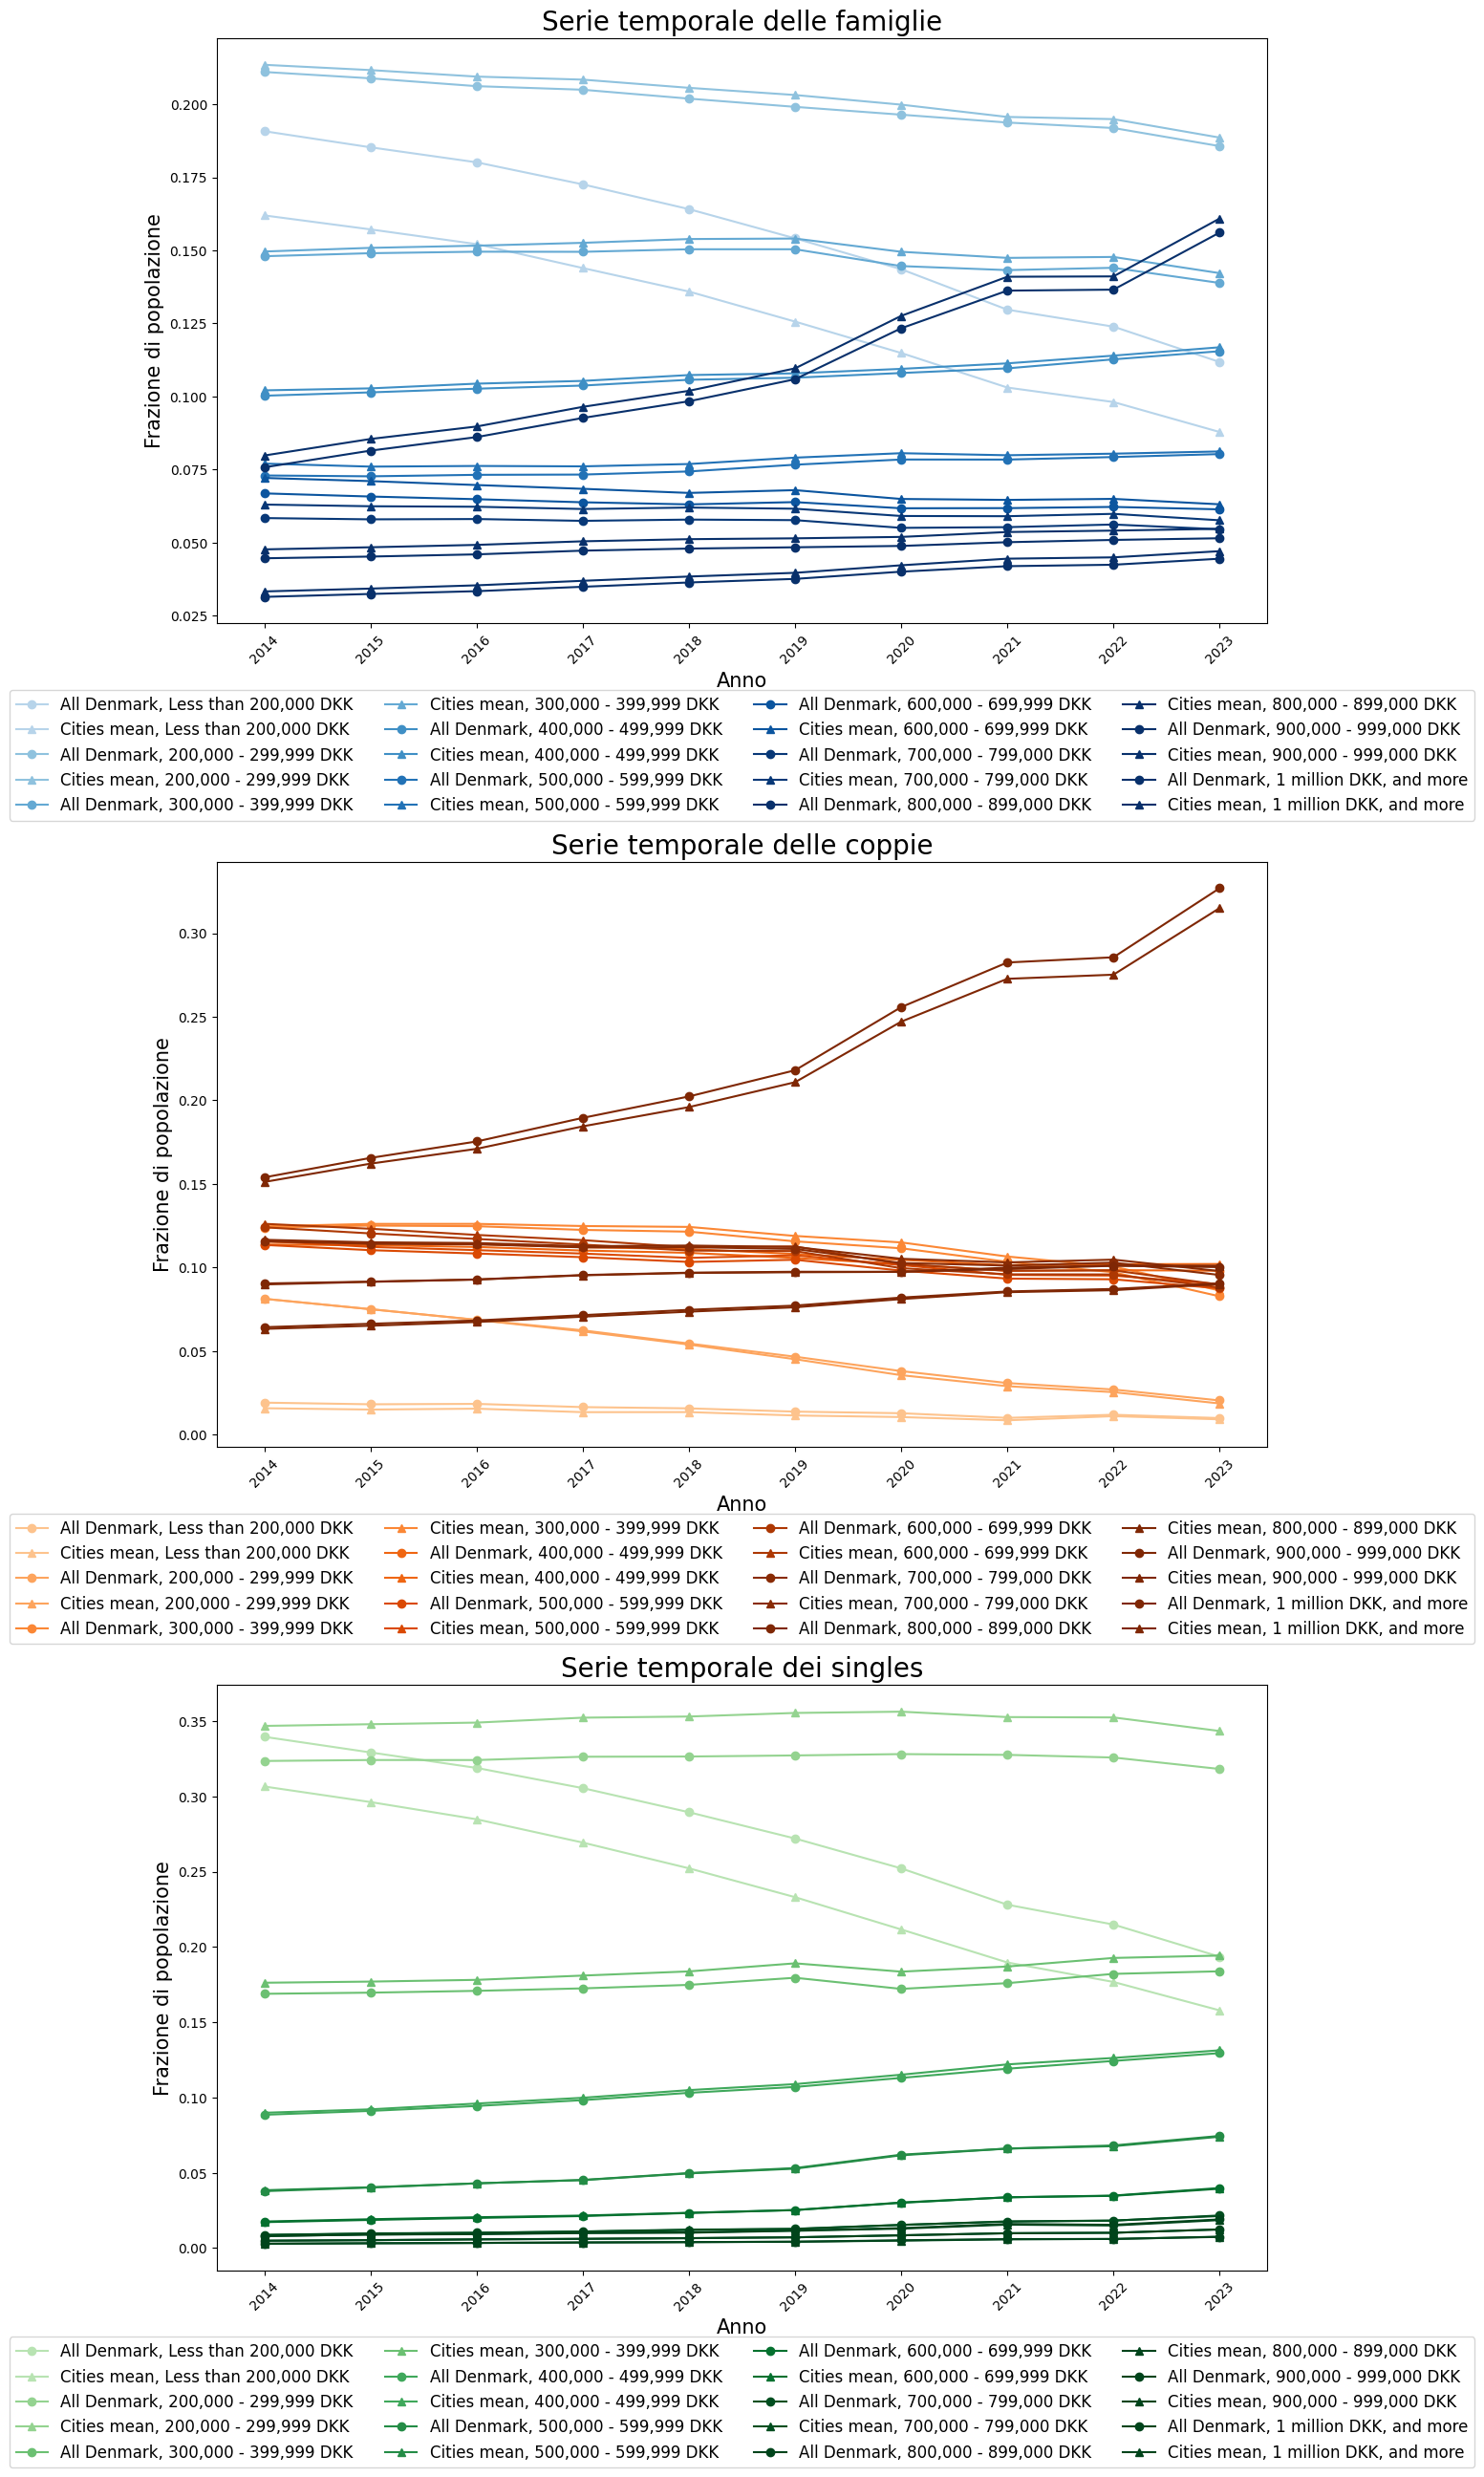

In [78]:
colors = cm.Blues(np.linspace(0.3, 1.3, 10))
colors_2 = cm.Oranges(np.linspace(0.3, 1.3, 10))
colors_3 = cm.Greens(np.linspace(0.3, 1.3, 10))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 26))

# Plot time series for families
for i, income_bracket in enumerate(df_fam_reddito_mean_on_cities['c2']):
    subset_1 = df_fam_reddito_all[df_fam_reddito_all['c2'] == income_bracket]
    subset_2 = df_fam_reddito_mean_on_cities[df_fam_reddito_mean_on_cities['c2'] == income_bracket]
    axes[0].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors[i], marker = 'o')
    axes[0].plot(columns_to, subset_2[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors[i], marker = '^')
axes[0].set_title(r'Serie temporale delle famiglie',fontsize=20)
axes[0].set_xlabel(r'Anno',fontsize=15)
axes[0].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[0].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[0].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(df_coup_reddito_mean_on_cities['c2']):
    subset_1 = df_coup_reddito_all[df_coup_reddito_all['c2'] == income_bracket]
    subset_2 = df_coup_reddito_mean_on_cities[df_coup_reddito_mean_on_cities['c2'] == income_bracket]
    axes[1].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_2[i], marker = 'o')
    axes[1].plot(columns_to, subset_2[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors_2[i], marker = '^')
axes[1].set_title(r'Serie temporale delle coppie',fontsize=20)
axes[1].set_xlabel(r'Anno',fontsize=15)
axes[1].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[1].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[1].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(df_sing_reddito_mean_on_cities['c2']):
    subset_1 = df_sing_reddito_all[df_sing_reddito_all['c2'] == income_bracket]
    subset_2 = df_sing_reddito_mean_on_cities[df_sing_reddito_mean_on_cities['c2'] == income_bracket]
    axes[2].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_3[i], marker = 'o')
    axes[2].plot(columns_to, subset_2[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors_3[i], marker = '^')
axes[2].set_title(r'Serie temporale dei singles',fontsize=20)
axes[2].set_xlabel(r'Anno',fontsize=15)
axes[2].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[2].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### <span style="color:red">2. Analisi</span>
Innanzitutto si può notare che per ogni categoria le fasce che presentano una maggiore variazione sono l'ultima e la prima.
Inoltre si nota un **andamento molto simile per ogni fascia** tra le medie delle città e i dati su tutta la Danimarca. Tuttavia per la prima e l'ultima fascia si nota un piccolo discostamento.

Considero quindi solo la prima e l'ultima fascia per ogni categoria e rappresento le medie delle città con il rispettivo errore (deviazione standard) ricavato precedentemente con il Fit gaussiano.

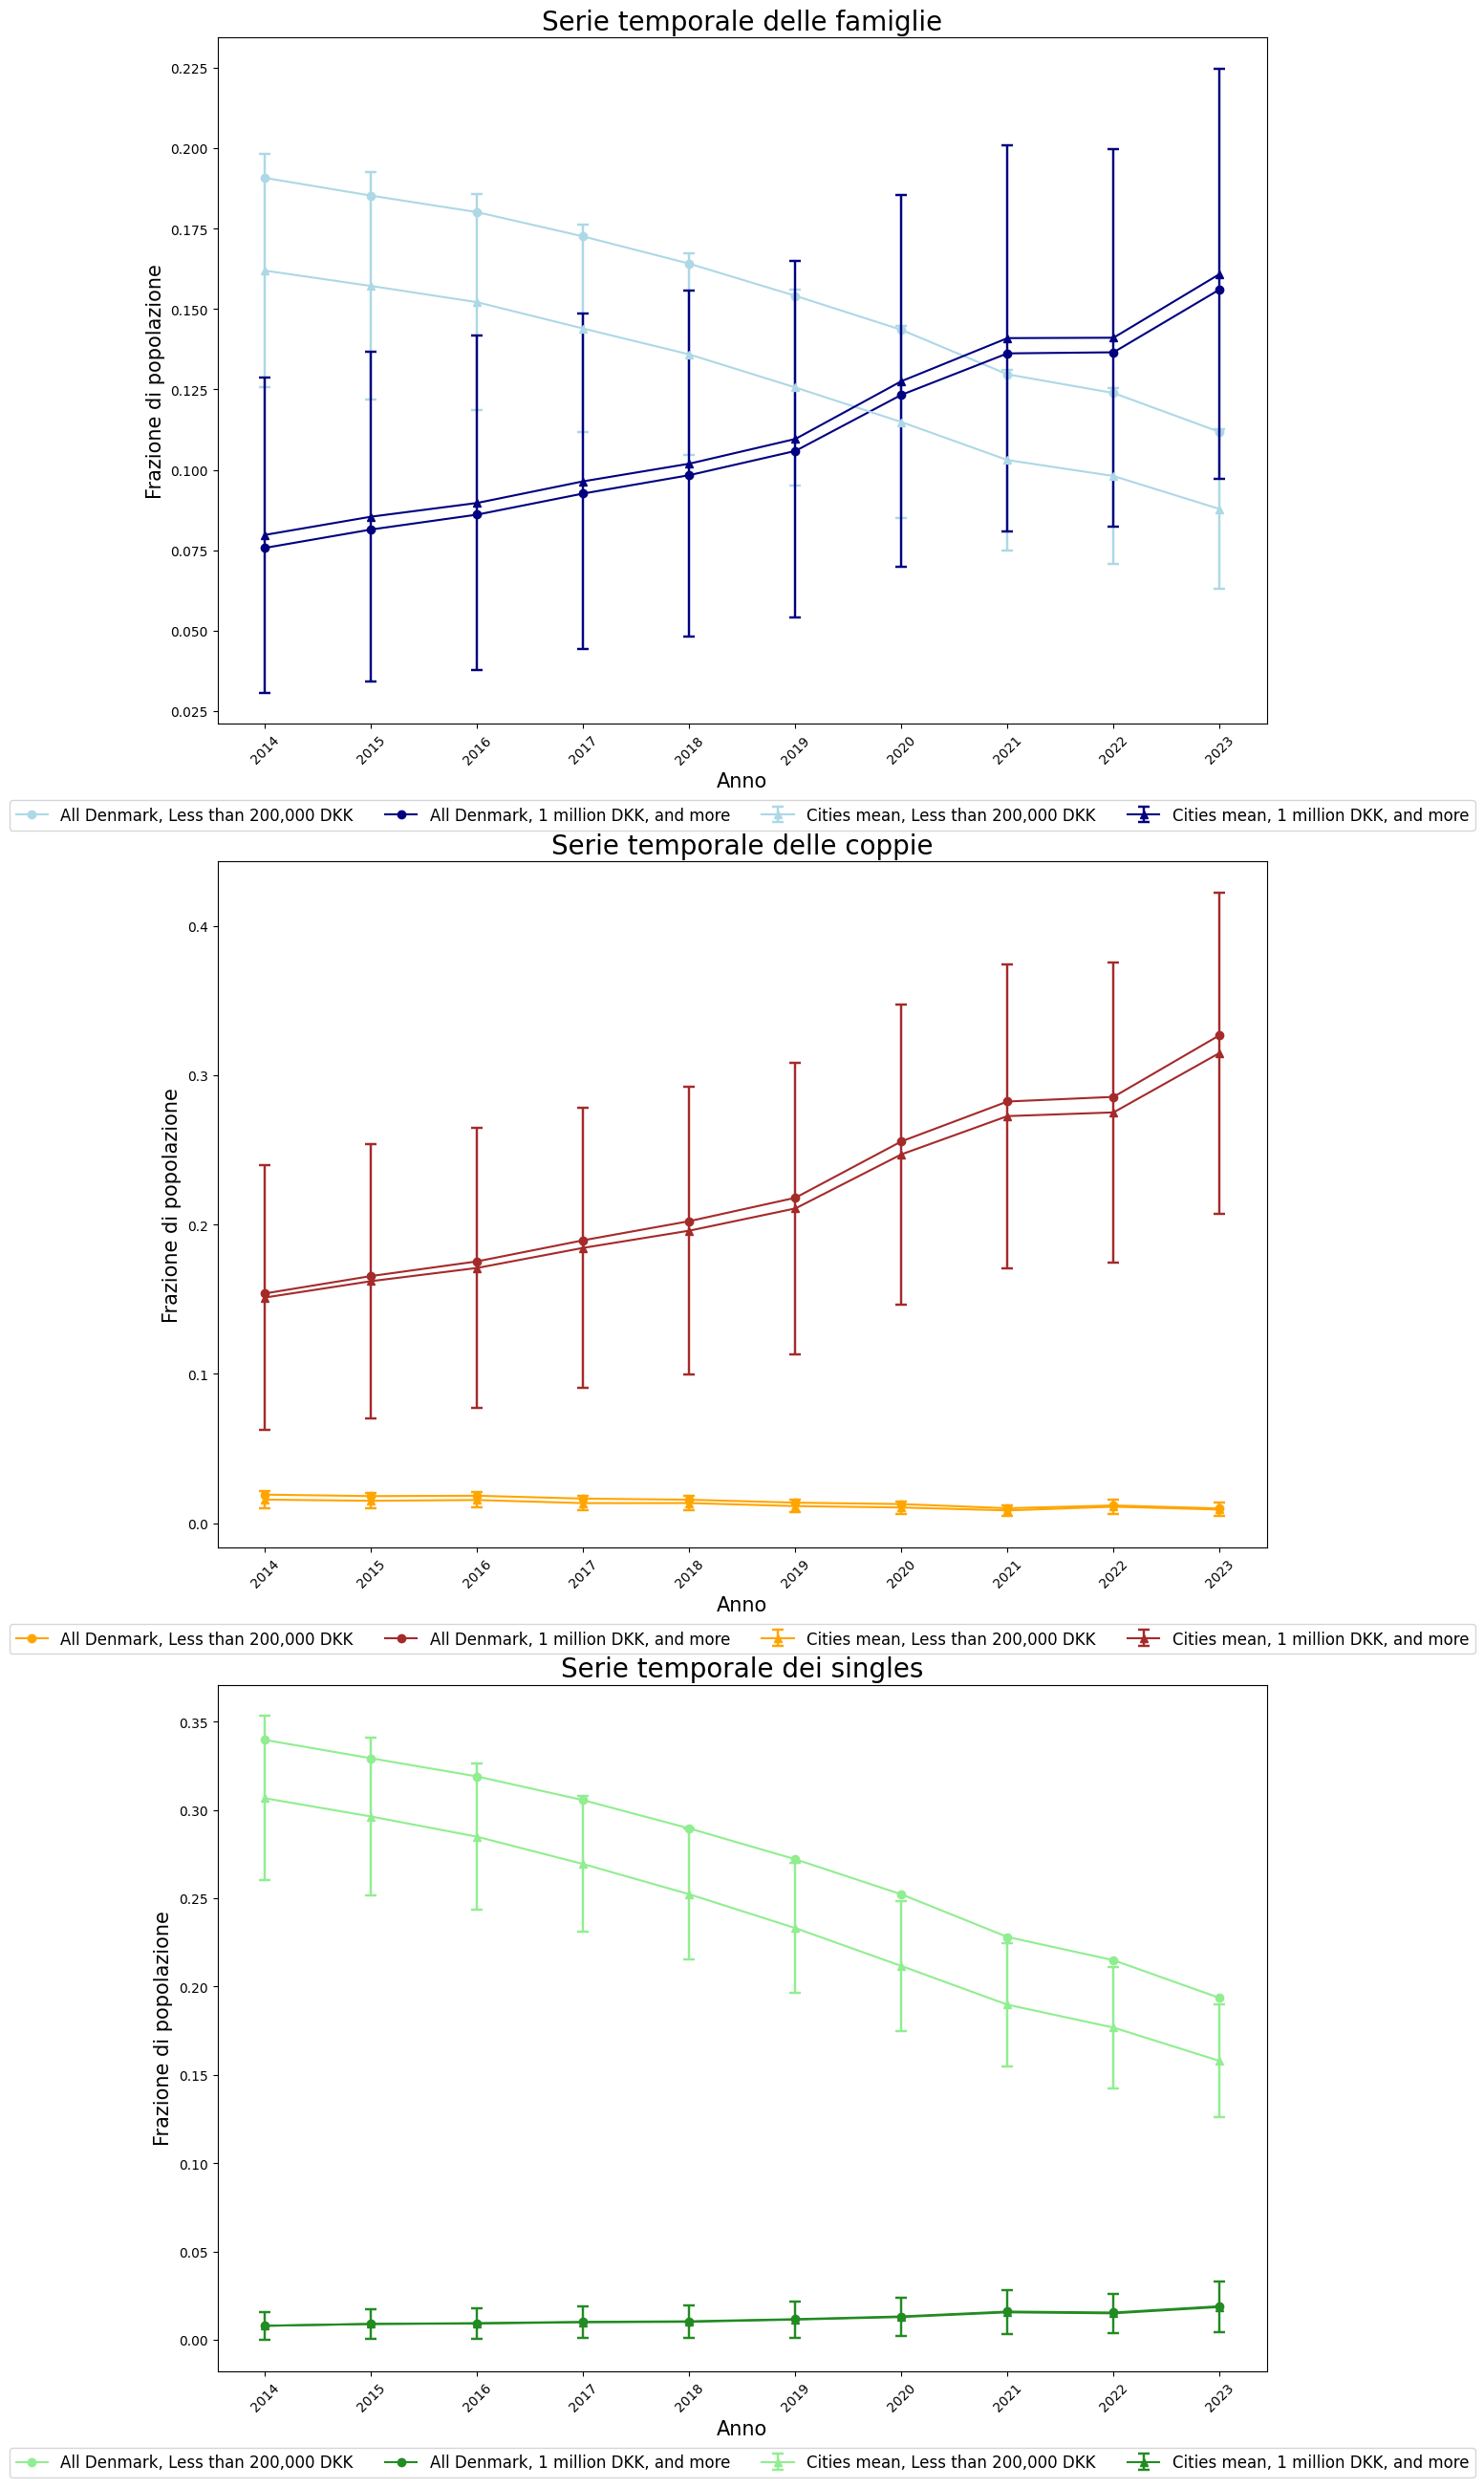

In [79]:
colors = cm.Blues(np.linspace(0.3, 1.3, 10))
colors_2 = cm.Oranges(np.linspace(0.3, 1.3, 10))
colors_3 = cm.Greens(np.linspace(0.3, 1.3, 10))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 26))

income_brackets_mod=['Less than 200,000 DKK','1 million DKK, and more']
colors_new = ['lightblue','navy']
colors_2_new = ['orange','brown']
colors_3_new = ['lightgreen','forestgreen']

# Plot time series for families
for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_fam_reddito_all[df_fam_reddito_all['c2'] == income_bracket]
    subset_2 = df_fam_reddito_mean_on_cities[df_fam_reddito_mean_on_cities['c2'] == income_bracket]
    axes[0].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_new[i], marker = 'o')
    axes[0].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_fam[df_parameters_fam['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean, {income_bracket}', color=colors_new[i], ecolor=colors_new[i], marker = '^',elinewidth=1.75, capsize=4, capthick=1.75)
axes[0].set_title(r'Serie temporale delle famiglie',fontsize=20)
axes[0].set_xlabel(r'Anno',fontsize=15)
axes[0].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[0].grid(False)
axes[0].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[0].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_coup_reddito_all[df_coup_reddito_all['c2'] == income_bracket]
    subset_2 = df_coup_reddito_mean_on_cities[df_coup_reddito_mean_on_cities['c2'] == income_bracket]
    axes[1].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_2_new[i], marker = 'o')
    axes[1].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_coup[df_parameters_coup['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean, {income_bracket}', color=colors_2_new[i], ecolor=colors_2_new[i], marker = '^',elinewidth=1.75, capsize=4, capthick=1.75)
axes[1].set_title(r'Serie temporale delle coppie',fontsize=20)
axes[1].set_xlabel(r'Anno',fontsize=15)
axes[1].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[1].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[1].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_sing_reddito_all[df_sing_reddito_all['c2'] == income_bracket]
    subset_2 = df_sing_reddito_mean_on_cities[df_sing_reddito_mean_on_cities['c2'] == income_bracket]
    axes[2].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_3_new[i], marker = 'o')
    axes[2].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_sing[df_parameters_sing['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean, {income_bracket}', color=colors_3_new[i], ecolor=colors_3_new[i], marker = '^',elinewidth=1.75, capsize=4, capthick=1.75)
axes[2].set_title(r'Serie temporale dei singles',fontsize=20)
axes[2].set_xlabel(r'Anno',fontsize=15)
axes[2].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[2].legend(fontsize=12,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### <span style="color:red">2. Analisi</span>

Si può notare che **le due serie sono compatibili entro $\textbf{1} \sigma$**. Quindi si può considerare una buona approssimazione studiare l'andamento mediato sulle città invece che la popolazione totale della Danimarca.

In generale, soprattutto per le famiglie, si nota come negli anni la popolazione nella fascia di reddito più bassa decresca sempre più, mentre quella nella fascia più alta cresca.

## <span style="color:red">3. Studio della popolazione per fascia di reddito senza le 5 città più popolose</span>

Mi chiedo ora se il fatto che la **media per città vari**, in particolare che diminuisca per le fascia più bassa e cresca per quella più alta, **implica un miglioramento della vita per tutta la Danimarca, oppure il miglioramento è dovuto solo al contributo delle città più popolate**.

Verifico quindi se la variazione delle persone per fascia di reddito negli anni sia dovuta principalmente alle città più popolate della Danimarca oppure è un trend comune a tutta la Danimarca.

Per fare ciò rimuovo le 5 città più popolate della Danimarca, raffigurate nel grafico sottostante, che sono (in ordine):
1. Copenhagen
2. Aarhus
3. Aalborg
4. Odense
5. Esbjerg

Mostro un grafico che rappresenta la popolazione totale media sugli anni per città (quindi delle famiglie).

In seguito **ho studiato nuovamente le distribuzioni** per città fissati fasce di reddito e anni, senza le 5 città. Ho di nuovo eseguito un test di **Kolmogorov-Smirnov** e ho studiato l'andamento delle medie per città confrontandole con quelle calcolate al punto 2 e ai dati di tutta la Danimarca.

In [80]:
df_list_freq=[]
df_list_reddito=[]
cities = ['Copenhagen', 'Aarhus','Aalborg', 'Odense', 'Esbjerg']
for city in cities:
	df_list_freq.append(df_families_all_freq[df_families_all_freq['place']==city])
	df_list_freq.append(df_couples_all_freq[df_couples_all_freq['place']==city])
	df_list_freq.append(df_singles_all_freq[df_singles_all_freq['place']==city])
	df_list_reddito.append(df_fam_reddito_cities_norm[df_fam_reddito_cities_norm['place']==city])
	df_list_reddito.append(df_coup_reddito_cities_norm[df_coup_reddito_cities_norm['place']==city])
	df_list_reddito.append(df_sing_reddito_cities_norm[df_sing_reddito_cities_norm['place']==city])
df_fin_freq = pd.concat(df_list_freq).reset_index().drop(columns=['level_0','index','c1','c2'])
df_fin_freq['media'] = df_fin_freq.loc[:, columns_to].mean(axis=1)
df_fin_reddito = pd.concat(df_list_reddito).reset_index().drop(columns=['level_0','index','c1'])
df_fin_reddito['media'] = df_fin_reddito.loc[:, columns_to].mean(axis=1)
df_fin_freq

,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,media
0,"Families, total",Copenhagen,343970.0,349454.0,354843.0,360914.0,366895.0,371417.0,377095.0,381659.0,384503.0,388467.0,367921.7
1,"Couples, total",Copenhagen,106559.0,109497.0,112115.0,114377.0,116561.0,118785.0,120371.0,120605.0,121741.0,123296.0,116390.7
2,"Single people, total",Copenhagen,237411.0,239957.0,242728.0,246537.0,250334.0,252632.0,256724.0,261054.0,262762.0,265171.0,251531.0
3,"Families, total",Aarhus,178197.0,180365.0,183355.0,186829.0,190326.0,193585.0,196330.0,199044.0,202131.0,205977.0,191613.9
4,"Couples, total",Aarhus,70968.0,72059.0,73335.0,74513.0,75389.0,76401.0,77130.0,76952.0,77335.0,78693.0,75277.5
5,"Single people, total",Aarhus,107229.0,108306.0,110020.0,112316.0,114937.0,117184.0,119200.0,122092.0,124796.0,127284.0,116336.4
6,"Families, total",Aalborg,111141.0,112469.0,113628.0,114806.0,116243.0,117592.0,119879.0,121234.0,121619.0,122416.0,117102.7
7,"Couples, total",Aalborg,49035.0,49572.0,50147.0,50588.0,51098.0,51615.0,52005.0,51985.0,51854.0,51768.0,50966.7
8,"Single people, total",Aalborg,62106.0,62897.0,63481.0,64218.0,65145.0,65977.0,67874.0,69249.0,69765.0,70648.0,66136.0
9,"Families, total",Odense,105446.0,107046.0,108109.0,109606.0,111004.0,112074.0,112954.0,113461.0,114130.0,115055.0,110888.5


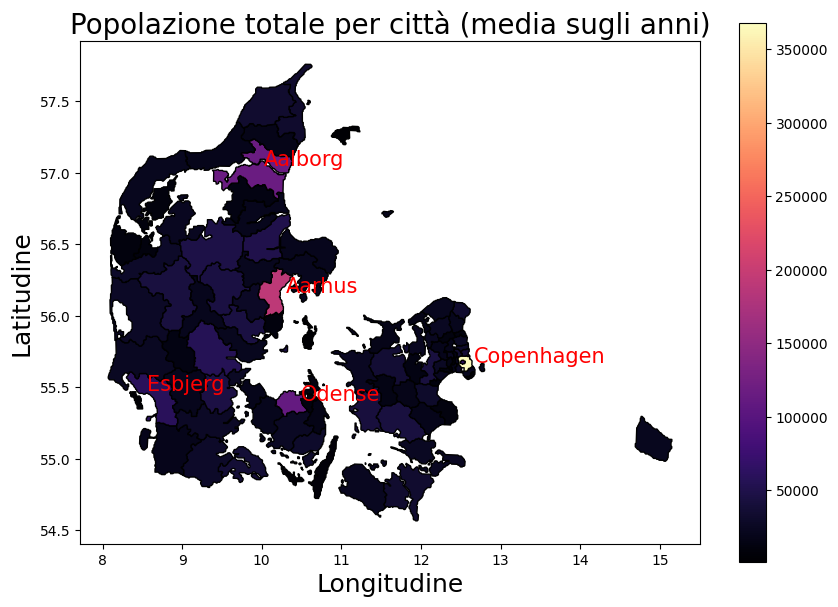

In [15]:
gdf = gpd.read_file('geoBoundaries-DNK-ADM2_simplified.shp', encoding='utf-8')

df_fam_freq_cities['Media']=df_fam_freq_cities.loc[:,columns_to].mean(axis=1)
df_coup_freq_cities['Media']=df_coup_freq_cities.loc[:,columns_to].mean(axis=1)
df_sing_freq_cities['Media']=df_sing_freq_cities.loc[:,columns_to].mean(axis=1)
merged_fam = gdf.merge(df_fam_freq_cities, how='left', left_on='shapeName', right_on='place')
merged_coup = gdf.merge(df_coup_freq_cities, how='left', left_on='shapeName', right_on='place')
merged_sing = gdf.merge(df_sing_freq_cities, how='left', left_on='shapeName', right_on='place')

data = {
    'city': ['Copenhagen', 'Aarhus', 'Aalborg','Odense', 'Esbjerg'],
    'longitude': [12.5683, 10.2039,  9.9217, 10.3883, 8.4574],  # Longitudine
    'latitude': [55.6761, 56.1629, 57.0488, 55.4038, 55.4765]  # Latitudine
}
df_plot_den = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 7))
sm = merged_fam.plot(column='Media', cmap='magma',legend=True,edgecolor='black',ax=ax)
sm.get_legend()

for i, row in df_plot_den.iterrows():
    ax.text(
        row['longitude'] + 0.1, row['latitude'], row['city'],fontsize=15, color='red')

ax.set_xlabel('Longitudine',fontsize=18)
ax.set_ylabel('Latitudine',fontsize=18)
ax.set_title(r"Popolazione totale per città (media sugli anni)", fontsize=20, color='black')
plt.show()

In [82]:
df_fam_reddito_cities_norm_mod = df_fam_reddito_cities_norm[~df_fam_reddito_cities_norm['place'].isin(cities)]
df_coup_reddito_cities_norm_mod = df_coup_reddito_cities_norm[~df_coup_reddito_cities_norm['place'].isin(cities)]
df_sing_reddito_cities_norm_mod = df_sing_reddito_cities_norm[~df_sing_reddito_cities_norm['place'].isin(cities)]

df_fam_reddito_cities_norm_mod

,index,c1,c2,c3,place,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,299,Families in the group (Number),"Less than 200,000 DKK","Families, total",Frederiksberg,0.236192,0.226522,0.220896,0.212659,0.197674,0.184014,0.171167,0.157384,0.155593,0.135912
101,596,Families in the group (Number),"200,000 - 299,999 DKK","Families, total",Frederiksberg,0.180358,0.179979,0.177881,0.174804,0.175350,0.174280,0.174693,0.177296,0.175139,0.167477
200,893,Families in the group (Number),"300,000 - 399,999 DKK","Families, total",Frederiksberg,0.134336,0.132560,0.131733,0.134360,0.131504,0.130091,0.120785,0.121685,0.122734,0.120360
299,1190,Families in the group (Number),"400,000 - 499,999 DKK","Families, total",Frederiksberg,0.104637,0.103992,0.105304,0.102330,0.106741,0.106508,0.105010,0.104568,0.104263,0.105270
398,1487,Families in the group (Number),"500,000 - 599,999 DKK","Families, total",Frederiksberg,0.074988,0.075507,0.075792,0.077735,0.078836,0.081838,0.083487,0.083175,0.086056,0.085962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,1879,Families in the group (Number),"600,000 - 699,999 DKK","Families, total",Vesthimmerlands,0.081114,0.082023,0.081992,0.079007,0.075616,0.078233,0.073631,0.073829,0.071780,0.066893
691,2176,Families in the group (Number),"700,000 - 799,000 DKK","Families, total",Vesthimmerlands,0.068070,0.065640,0.064920,0.066325,0.068140,0.067026,0.065222,0.064141,0.068537,0.066139
790,2473,Families in the group (Number),"800,000 - 899,000 DKK","Families, total",Vesthimmerlands,0.043242,0.047018,0.047901,0.049325,0.049371,0.052155,0.052232,0.056671,0.057024,0.059029
889,2770,Families in the group (Number),"900,000 - 999,000 DKK","Families, total",Vesthimmerlands,0.025814,0.026977,0.028001,0.031570,0.036625,0.034914,0.040265,0.046387,0.042700,0.047935


In [ ]:
df_parameters_fam_mod=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_fam_mod.index.name = 'Famiglie'
df_parameters_coup_mod=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_coup_mod.index.name = 'Coppie'
df_parameters_sing_mod=pd.DataFrame(columns=['c2','Year','Mean','Std_dev','p-value','Result'])
df_parameters_sing_mod.index.name = 'Singles'
limits={'Less than 200,000 DKK':[0.,0.45], '200,000 - 299,999 DKK':[0.,0.5],'300,000 - 399,999 DKK':[0.,0.27],'400,000 - 499,999 DKK':[0.,0.2],'500,000 - 599,999 DKK':[0.,0.16],'600,000 - 699,999 DKK':[0.,0.16],'700,000 - 799,000 DKK':[0.,0.14],'800,000 - 899,000 DKK':[0.,0.14],'900,000 - 999,000 DKK':[0.,0.12],'1 million DKK, and more':[0.,0.7]}

# Funzione per creare una GIF
def gif_distrib_mod(years):
    files = []
    
    income_brackets = df_fam_reddito_cities_norm_mod['c2'].unique()
    
    for j,year in enumerate(years):
        file = f'./temp_images/distrib_mod_{year}.png'
        files.append(file)
        
        fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 29))
        axes = axes.flatten()

        for i, income_bracket in enumerate(income_brackets):
            df_distrib_fam = df_fam_reddito_cities_norm_mod[df_fam_reddito_cities_norm_mod['c2'] == income_bracket]
            df_distrib_coup = df_coup_reddito_cities_norm_mod[df_coup_reddito_cities_norm_mod['c2'] == income_bracket]
            df_distrib_sing = df_sing_reddito_cities_norm_mod[df_sing_reddito_cities_norm_mod['c2'] == income_bracket]

            ax1 = axes[2 * i] 
            ax2 = axes[2 * i + 1] 

            # Plot Istogramma
            sns.histplot(df_distrib_fam[str(year)], bins=25, color='navy', edgecolor='navy', label='Famiglie', kde=False, alpha=0.5, ax=ax1)
            sns.histplot(df_distrib_coup[str(year)], bins=25, color='darkorange', edgecolor='darkorange', label='Coppie', alpha=0.5, ax=ax1)
            sns.histplot(df_distrib_sing[str(year)], bins=25, color='forestgreen', edgecolor='forestgreen', label='Singles', alpha=0.5, ax=ax1)
            
            mu_fam,std_fam = norm.fit(df_distrib_fam[str(year)])
            k_stats_fam,k_pval_fam=kstest(df_distrib_fam[str(year)],'norm',args=(mu_fam,std_fam))
            if k_pval_fam>=0.01:
                res_fam="True"
            elif k_pval_fam<0.01:
                res_fam="False"
            mu_coup,std_coup = norm.fit(df_distrib_coup[str(year)])
            k_stats_coup,k_pval_coup=kstest(df_distrib_coup[str(year)],'norm',args=(mu_coup,std_coup))
            if k_pval_coup>=0.01:
                res_coup="True"
            elif k_pval_coup<0.01:
                res_coup="False"
            mu_sing,std_sing = norm.fit(df_distrib_sing[str(year)])
            k_stats_sing,k_pval_sing=kstest(df_distrib_sing[str(year)],'norm',args=(mu_sing,std_sing))
            if k_pval_sing>=0.01:
                res_sing="True"
            elif k_pval_sing<0.01:
                res_sing="False"
            df_parameters_fam_mod.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_fam,std_fam,k_pval_fam,res_fam]
            df_parameters_coup_mod.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_coup,std_coup,k_pval_coup,res_coup]
            df_parameters_sing_mod.loc[j*len(income_brackets)+i]=[income_bracket,year,mu_sing,std_sing,k_pval_sing,res_sing]
            
            xmin,xmax= ax1.get_xlim()
            xmin_fam=df_distrib_fam[str(year)].min()
            xmax_fam=df_distrib_fam[(str(year))].max()
            x_fam=np.linspace(xmin_fam,xmax_fam,100)
            xmin_coup=df_distrib_coup[str(year)].min()
            xmax_coup=df_distrib_coup[(str(year))].max()
            x_coup=np.linspace(xmin_coup,xmax_coup,100)
            xmin_sing=df_distrib_sing[str(year)].min()
            xmax_sing=df_distrib_sing[(str(year))].max()
            x_sing=np.linspace(xmin_sing,xmax_sing,100)
            x= np.linspace(xmin,xmax,100)
            prob_fam=norm(mu_fam,std_fam)
            prob_coup=norm(mu_coup,std_coup)
            prob_sing=norm(mu_sing,std_sing)
            ax1.plot(x_fam,prob_fam.pdf(x_fam),color='navy',label=r'Famiglie, Gauss-fit')
            ax1.plot(x_coup,prob_coup.pdf(x_coup),color='darkorange',label=r'Coppie, Gauss-fit')
            ax1.plot(x_sing,prob_sing.pdf(x_sing),color='forestgreen',label=r'Singles, Gauss-fit')
            ax1.set_xlabel(r'Frazione di popolazione nella fascia', fontsize=12)
            ax1.set_ylabel(r'Count', fontsize=12)
            ax1.set_xlim(left=limits[income_bracket][0],right=limits[income_bracket][1])
            ax1.grid(True, which='both', axis='x')
            ax1.set_title(f'Histo || {income_bracket}', fontsize=15)
            ax1.legend()

            # Plot KDE Cumulativo
            sns.kdeplot(df_distrib_fam[str(year)], color='navy', cumulative=True, label='Famiglie (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            sns.kdeplot(df_distrib_coup[str(year)], color='darkorange', cumulative=True, label='Coppie (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            sns.kdeplot(df_distrib_sing[str(year)], color='forestgreen', cumulative=True, label='Singles (KDE)', linestyle='--', alpha=0.5, ax=ax2)
            ax2.plot(x_fam,prob_fam.cdf(x_fam),color='navy',label=r'Famiglie, Gauss-fit')
            ax2.plot(x_coup,prob_coup.cdf(x_coup),color='darkorange',label=r'Coppie, Gauss-fit')
            ax2.plot(x_sing,prob_sing.cdf(x_sing),color='forestgreen', label=r'Singles, Gauss-fit')
            ax2.set_xlabel(r'Frazione di popolazione nella fascia', fontsize=12)
            ax2.set_ylabel(r'Density', fontsize=12)
            ax2.set_xlim(left=limits[income_bracket][0],right=limits[income_bracket][1])
            ax2.grid(True, which='both', axis='x')
            ax2.set_title(f'Cumulativa || {income_bracket}', fontsize=15)
            ax2.legend()

            plt.suptitle(f'Anno: {year}', fontsize=18)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95) 
        plt.savefig(file)

    # Creiamo la GIF
    images = [Image.open(file) for file in files]
    out_path = './distrib_mod.gif'
    images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=2000, loop=0)
    
    # Pulizia delle immagini temporanee
    for image in images:
        image.close()
    for file in files:
        os.remove(file)

years = np.arange(2014,2024)
gif_distrib_mod(years)

In [84]:
HTML("<img src='distrib_mod.gif' style='width: 1500px;'/>")

In [85]:
income_brackets = df_fam_reddito_cities_norm_mod['c2'].unique()
for income_bracket in income_brackets:
	print(df_parameters_fam_mod[df_parameters_fam_mod['c2']==income_bracket].sort_values(by='Year'),"\n",df_parameters_coup_mod[df_parameters_coup_mod['c2']==income_bracket].sort_values(by='Year'),"\n",df_parameters_sing_mod[df_parameters_sing_mod['c2']==income_bracket].sort_values(by='Year'),"\n\n")

                             c2  Year      Mean   Std_dev   p-value Result
Famiglie                                                                  
0         Less than 200,000 DKK  2014  0.157324  0.029398  0.547305   True
10        Less than 200,000 DKK  2015  0.152607  0.028511  0.679723   True
20        Less than 200,000 DKK  2016  0.147612  0.026533  0.802068   True
30        Less than 200,000 DKK  2017  0.139351  0.024329  0.716792   True
40        Less than 200,000 DKK  2018  0.131366  0.023054  0.770168   True
50        Less than 200,000 DKK  2019  0.121015  0.021523  0.698464   True
60        Less than 200,000 DKK  2020  0.110266  0.020871  0.563690   True
70        Less than 200,000 DKK  2021  0.098740  0.019513  0.297137   True
80        Less than 200,000 DKK  2022  0.093985  0.019067  0.237016   True
90        Less than 200,000 DKK  2023  0.084077  0.017015  0.370984   True 
                            c2  Year      Mean   Std_dev   p-value Result
Coppie                   

In [86]:
count_true_fam_mod = (df_parameters_fam_mod['Result'] == 'True').sum()/len(df_parameters_fam_mod)
count_true_coup_mod = (df_parameters_coup_mod['Result'] == 'True').sum()/len(df_parameters_coup_mod)
count_true_sing_mod = (df_parameters_sing_mod['Result'] == 'True').sum()/len(df_parameters_sing_mod)
print("Percentuale di test con esito positivo sulle famiglie: ",count_true_fam_mod*100, "%")
print("Percentuale di test con esito positivo sulle coppie:   ",count_true_coup_mod*100, "%")
print("Percentuale di test con esito positivo sui single:     ",count_true_sing_mod*100, "%")

Percentuale di test con esito positivo sulle famiglie:  94.0 %
Percentuale di test con esito positivo sulle coppie:    90.0 %
Percentuale di test con esito positivo sui single:      67.0 %


### <span style="color:red">3. Analisi</span>

In questo caso la statistica è migliorata, infatti adesso le percentuali di test positivi sono diventati:
* $94\%$ per le famiglie
* $90\%$ per le coppie
* $67\%$ per i singles

Questo miglioramento può essere dovuto al fatto che **le città più popolate siano degli outliers per le ditribuzioni** e che quindi popolino più le code e rendano meno compatibile il fit.

Anche in questo caso quindi considero **non rigettabile l'ipotesi che le distribuzioni siano gaussiane**. Assumo che le distribuzioni siano effettivamente gaussiane e ricavo media e deviazione standard per ogni città, per ogni categoria e per ogni anno e rifaccio un'analisi uguale alla sezione 2.

In [87]:
df_fam_reddito_mean_on_cities_mod = df_fam_reddito_cities_norm[~df_fam_reddito_cities_norm['place'].isin(cities)].groupby(by='c2').mean().drop(columns='index').reset_index()
df_coup_reddito_mean_on_cities_mod = df_coup_reddito_cities_norm[~df_coup_reddito_cities_norm['place'].isin(cities)].groupby(by='c2').mean().drop(columns='index').reset_index()
df_sing_reddito_mean_on_cities_mod = df_sing_reddito_cities_norm[~df_sing_reddito_cities_norm['place'].isin(cities)].groupby(by='c2').mean().drop(columns='index').reset_index()
df_fam_reddito_mean_on_cities_mod.loc[0], df_fam_reddito_mean_on_cities_mod.loc[9] = df_fam_reddito_mean_on_cities_mod.loc[9].copy(), df_fam_reddito_mean_on_cities_mod.loc[0].copy()
df_coup_reddito_mean_on_cities_mod.loc[0], df_coup_reddito_mean_on_cities_mod.loc[9] = df_coup_reddito_mean_on_cities_mod.loc[9].copy(), df_coup_reddito_mean_on_cities_mod.loc[0].copy()
df_sing_reddito_mean_on_cities_mod.loc[0], df_sing_reddito_mean_on_cities_mod.loc[9] = df_sing_reddito_mean_on_cities_mod.loc[9].copy(), df_sing_reddito_mean_on_cities_mod.loc[0].copy()
df_fam_reddito_mean_on_cities_mod.insert(1,"c3","Families, total")
df_coup_reddito_mean_on_cities_mod.insert(1,"c3","Couples, total")
df_sing_reddito_mean_on_cities_mod.insert(1,"c3","Single people, total")

In [88]:
df_reddito_mean_cities_mod = pd.concat([df_fam_reddito_mean_on_cities_mod,df_coup_reddito_mean_on_cities_mod,df_sing_reddito_mean_on_cities_mod])
df_reddito_mean_cities_mod

,c2,c3,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Less than 200,000 DKK","Families, total",0.157324,0.152607,0.147612,0.139351,0.131366,0.121015,0.110266,0.098740,0.093985,0.084077
1,"200,000 - 299,999 DKK","Families, total",0.213566,0.211767,0.209564,0.208532,0.205731,0.203293,0.199924,0.195482,0.194778,0.188413
2,"300,000 - 399,999 DKK","Families, total",0.149854,0.151112,0.151888,0.152955,0.154301,0.154486,0.150029,0.147786,0.148026,0.142405
3,"400,000 - 499,999 DKK","Families, total",0.102449,0.103105,0.104728,0.105641,0.107636,0.108190,0.109698,0.111607,0.114218,0.117024
4,"500,000 - 599,999 DKK","Families, total",0.077678,0.076570,0.076761,0.076613,0.077352,0.079530,0.080990,0.080235,0.080705,0.081411
5,"600,000 - 699,999 DKK","Families, total",0.072934,0.071815,0.070426,0.069104,0.067621,0.068573,0.065472,0.065085,0.065436,0.063432
6,"700,000 - 799,000 DKK","Families, total",0.063727,0.063136,0.062899,0.062099,0.062604,0.062232,0.059738,0.059613,0.060402,0.058148
7,"800,000 - 899,000 DKK","Families, total",0.048140,0.048899,0.049719,0.050948,0.051665,0.051934,0.052440,0.054171,0.054642,0.055234
8,"900,000 - 999,000 DKK","Families, total",0.033599,0.034553,0.035696,0.037258,0.038733,0.039998,0.042591,0.044924,0.045346,0.047492
9,"1 million DKK, and more","Families, total",0.080730,0.086438,0.090705,0.097500,0.102992,0.110748,0.128854,0.142355,0.142461,0.162362


In [89]:
# Numero di anni
n_years = 2023-2014

# Funzione per creare una GIF
def gif_mean_2(years):
    files = []
    
    for i in years:
        file = f'./temp_images/barplot_{i}.png'
        files.append(file)
        df_mod_redd=df_reddito_mean_cities_mod[['c2','c3',str(i)]]
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x='c2', y=str(i), hue='c3', data=df_mod_redd, dodge=True)
        
        plt.title(f"Popolazione per fascia di reddito - Media sulle città (senza le 5) - Anno {i}", fontsize=18)
        plt.xlabel("Fascia di reddito", fontsize=18)
        plt.ylabel("Popolazione", fontsize=18)
        plt.xticks(rotation=60)
        plt.ylim((0,0.37))
        plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        plt.savefig(file)
        plt.close()

    # Creiamo la GIF
    images = [Image.open(file) for file in files]
    out_path = './pop3.gif'
    images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
    
    # Pulizia delle immagini temporanee
    for image in images:
        image.close()
    for file in files:
        os.remove(file)

# Genera la GIF per ogni anno
years = np.arange(2014,2024)
gif_mean_2(years)

In [90]:
HTML("<img src='pop3.gif' style='width: 1200px;'/>")

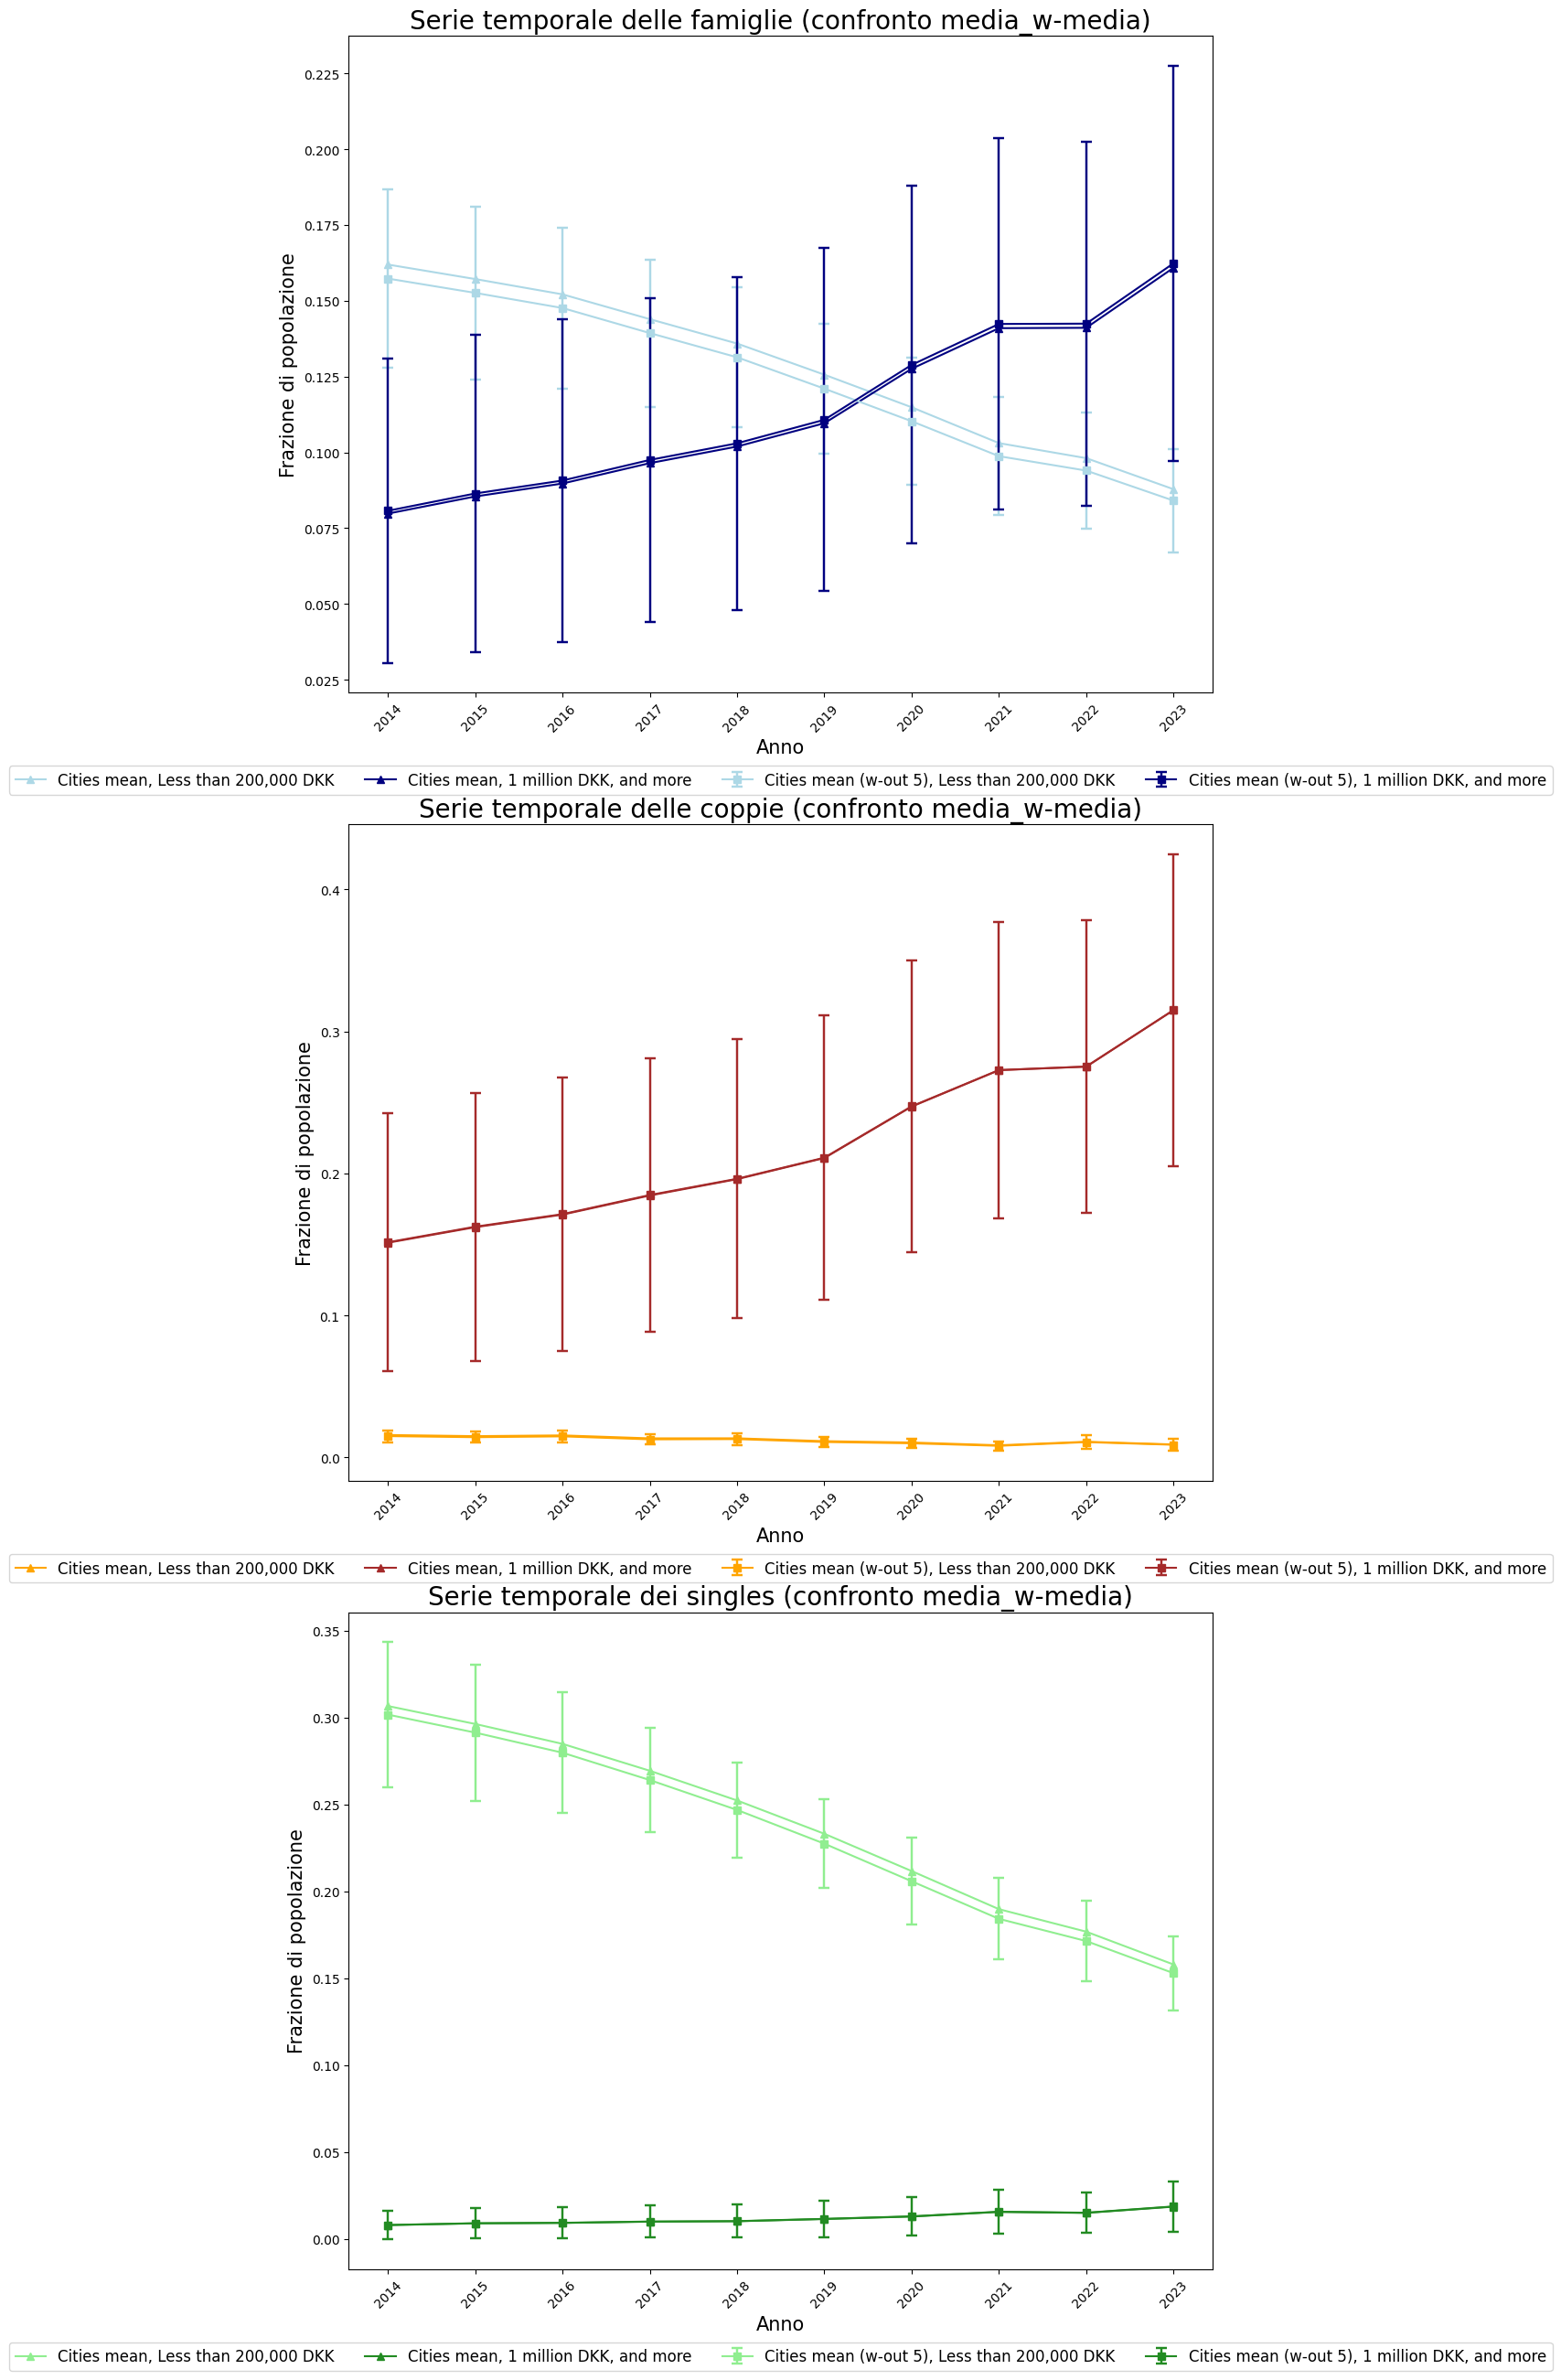

In [94]:
colors = cm.Blues(np.linspace(0.3, 1.3, 10))
colors_2 = cm.Oranges(np.linspace(0.3, 1.3, 10))
colors_3 = cm.Greens(np.linspace(0.3, 1.3, 10))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 26))

income_brackets_mod=['Less than 200,000 DKK','1 million DKK, and more']
colors_new = ['lightblue','navy']
colors_2_new = ['orange','brown']
colors_3_new = ['lightgreen','forestgreen']

# Plot time series for families
for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_fam_reddito_mean_on_cities[df_fam_reddito_mean_on_cities['c2'] == income_bracket]
    subset_2 = df_fam_reddito_mean_on_cities_mod[df_fam_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[0].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors_new[i], marker = '^')
    axes[0].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_fam_mod[df_parameters_fam_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_new[i], ecolor=colors_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[0].set_title(r'Serie temporale delle famiglie (confronto media_w-media)',fontsize=20)
axes[0].set_xlabel(r'Anno',fontsize=15)
axes[0].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[0].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[0].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_coup_reddito_mean_on_cities[df_coup_reddito_mean_on_cities['c2'] == income_bracket]
    subset_2 = df_coup_reddito_mean_on_cities_mod[df_coup_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[1].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors_2_new[i], marker = '^')
    axes[1].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_coup_mod[df_parameters_coup_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_2_new[i], ecolor=colors_2_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[1].set_title(r'Serie temporale delle coppie (confronto media_w-media)',fontsize=20)
axes[1].set_xlabel(r'Anno',fontsize=15)
axes[1].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[1].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[1].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_sing_reddito_mean_on_cities[df_sing_reddito_mean_on_cities['c2'] == income_bracket]
    subset_2 = df_sing_reddito_mean_on_cities_mod[df_sing_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[2].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'Cities mean, {income_bracket}', color=colors_3_new[i], marker = '^')
    axes[2].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_sing_mod[df_parameters_sing_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_3_new[i], ecolor=colors_3_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[2].set_title(r'Serie temporale dei singles (confronto media_w-media)',fontsize=20)
axes[2].set_xlabel(r'Anno',fontsize=15)
axes[2].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[2].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### <span style="color:red">3. Analisi</span>

Come si nota dalla GIF e dai grafici sopra, **la media senza le 5 città** più popolate della Danimarca segue un andamento simile e **non si discosta più di $\textbf{1}\sigma_w$** (dove $w$ indica il calcolo senza le 5 città) da quella calcolata tenendo conto di tutte le città.

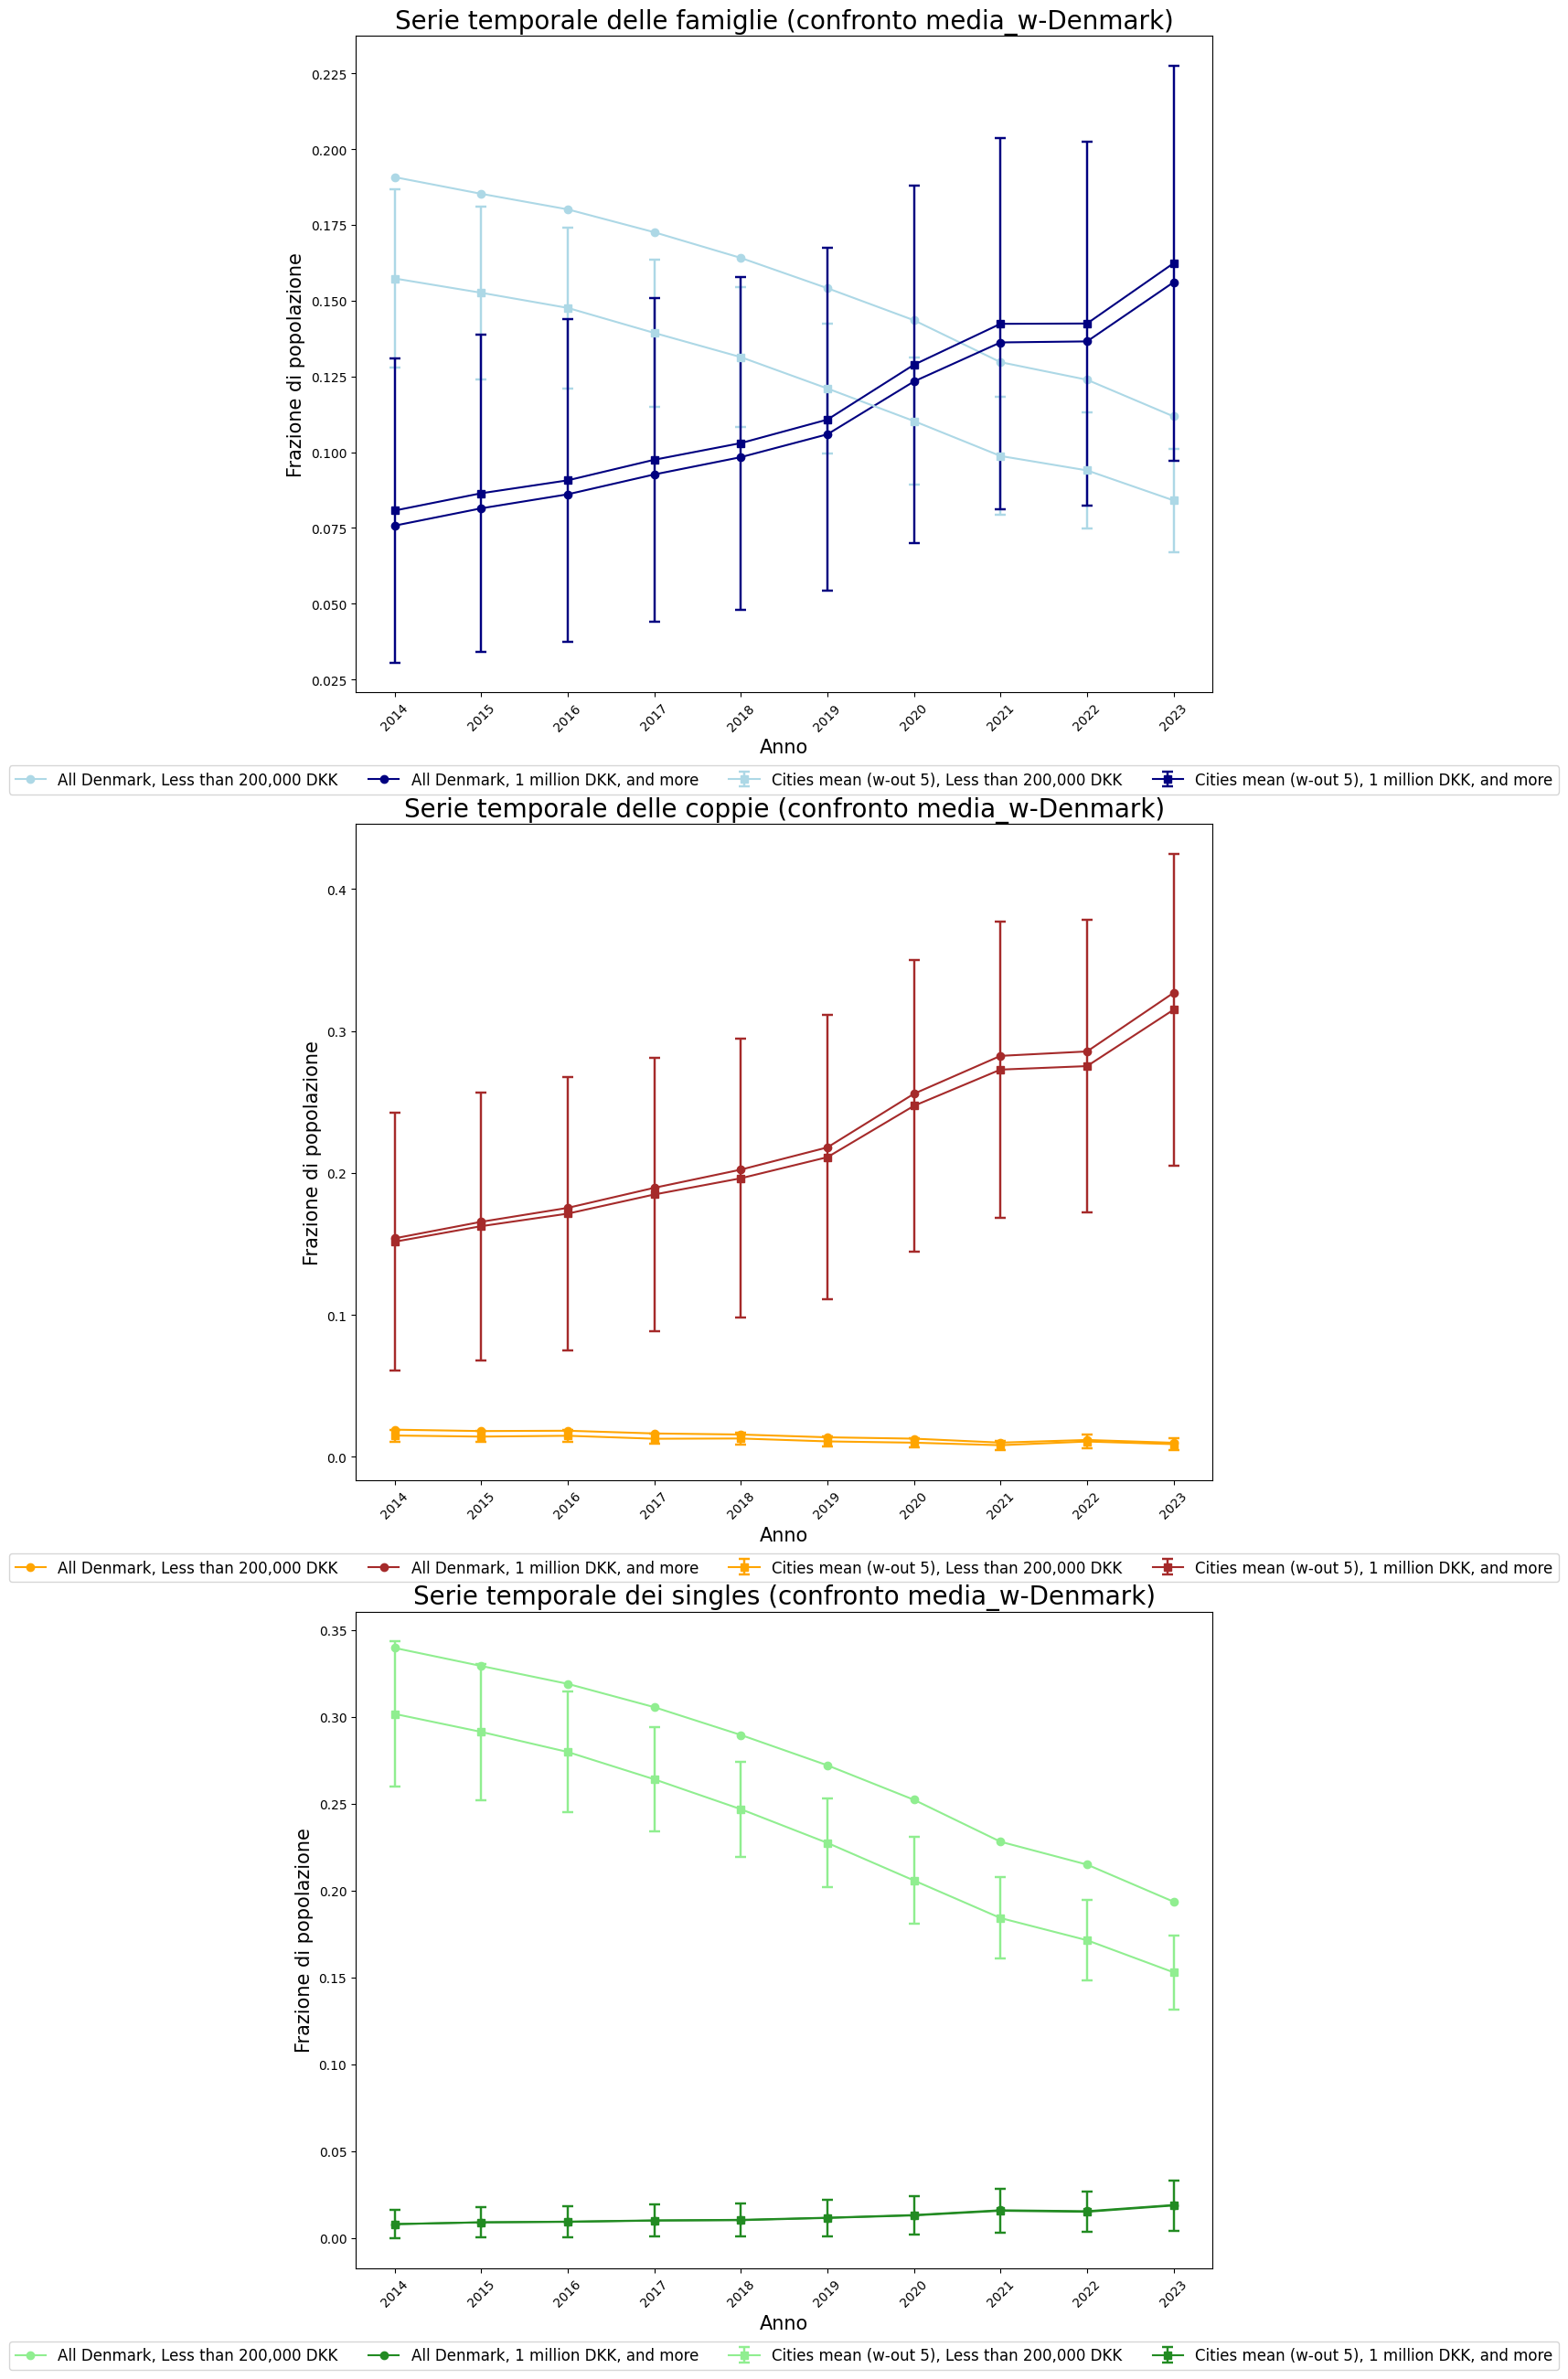

In [95]:
colors = cm.Blues(np.linspace(0.3, 1.3, 10))
colors_2 = cm.Oranges(np.linspace(0.3, 1.3, 10))
colors_3 = cm.Greens(np.linspace(0.3, 1.3, 10))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 26))

income_brackets_mod=['Less than 200,000 DKK','1 million DKK, and more']
colors_new = ['lightblue','navy']
colors_2_new = ['orange','brown']
colors_3_new = ['lightgreen','forestgreen']

# Plot time series for families
for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_fam_reddito_all[df_fam_reddito_all['c2'] == income_bracket]
    subset_2 = df_fam_reddito_mean_on_cities_mod[df_fam_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[0].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_new[i], marker = 'o')
    axes[0].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_fam_mod[df_parameters_fam_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_new[i], ecolor=colors_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[0].set_title(r'Serie temporale delle famiglie (confronto media_w-Denmark)',fontsize=20)
axes[0].set_xlabel(r'Anno',fontsize=15)
axes[0].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[0].grid(False)
axes[0].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[0].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_coup_reddito_all[df_coup_reddito_all['c2'] == income_bracket]
    subset_2 = df_coup_reddito_mean_on_cities_mod[df_coup_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[1].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_2_new[i], marker = 'o')
    axes[1].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_coup_mod[df_parameters_coup_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_2_new[i], ecolor=colors_2_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[1].set_title(r'Serie temporale delle coppie (confronto media_w-Denmark)',fontsize=20)
axes[1].set_xlabel(r'Anno',fontsize=15)
axes[1].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[1].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[1].tick_params(axis='x', rotation=45)

for i, income_bracket in enumerate(income_brackets_mod):
    subset_1 = df_sing_reddito_all[df_sing_reddito_all['c2'] == income_bracket]
    subset_2 = df_sing_reddito_mean_on_cities_mod[df_sing_reddito_mean_on_cities_mod['c2'] == income_bracket]
    axes[2].plot(columns_to, subset_1[columns_to].to_numpy().flatten(), label=f'All Denmark, {income_bracket}', color=colors_3_new[i], marker = 'o')
    axes[2].errorbar(x=columns_to, y=subset_2[columns_to].to_numpy().flatten(), yerr=df_parameters_sing_mod[df_parameters_sing_mod['c2']==income_bracket]['Std_dev'].to_numpy(), label=f'Cities mean (w-out 5), {income_bracket}', color=colors_3_new[i], ecolor=colors_3_new[i], marker = 's',elinewidth=1.75, capsize=4, capthick=1.75)
axes[2].set_title(r'Serie temporale dei singles (confronto media_w-Denmark)',fontsize=20)
axes[2].set_xlabel(r'Anno',fontsize=15)
axes[2].set_ylabel(r'Frazione di popolazione',fontsize=15)
axes[2].legend(fontsize=12, loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### <span style="color:red">3. Analisi</span>

Anche confrontando l'andamento della media senza le 5 città con la media su tutta la Danimarca si ottiene un andamento simile. Tuttavia, come emerge dai grafici, **i valori delle medie di singles e famiglie nella fascia più bassa non sono compatibili con quelli di tutta la Danimarca entro $\textbf{1}\sigma_w$**.

## <span style="color:red">Conclusioni</span>

Ho studiato la popolazione della Danimarca per fascia di reddito e l'ho confrontata dapprima con quella media per città, ed in seguito con quella media per città ma senza le 5 città più popolate. Prima del confronto sono arrivato ad affermare anche che per la maggior parte delle ditribuzioni non posso rigettare l'ipotesi che seguano una distribuzione normale.

In conclusione posso affermare che verosimilmente **la variazione del numero di famiglie e singles nella fascia più bassa è dovuta principalmente alla variazione delle città più popolate**. In generale però **tutte le città hanno andamenti simili**, il che porta a dire che in tutta la Danimarca si ha una diminuzione di popolazione meno abbiente.